In [8]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sb
from datetime import time
from dotenv import load_dotenv
load_dotenv()
import os
import pandas as pd

# data_lists = [created_apps, total_transaction_amount, total_sender_number, total_receiver_number, total_active_accounts, mean_transaction_amount_per_sender,
# mean_transaction_amount_per_receiver, mean_amount_of_unique_receiver_for_sender, mean_amount_of_unique_sender_for_receiver, only_sender_accounts,
# only_receiver_accounts, percent_of_senders_only_senders, percent_of_receivers_only_receivers, percent_of_accounts_only_senders, percent_of_accounts_only_receivers,
# sender_average_transacted_accounts, receiver_average_transacted_accounts,sender_average_transacted_with_same_accounts, receiver_average_transacted_with_same_accounts,
# most_frequent_ids, percentage_of_total_transactions_per_asset, unique_senders_per_asset, unique_receivers_per_asset, unique_accounts_per_asset,
# percentage_of_total_accounts_per_asset, transactions_one_algo, involved_accounts_per_type, involved_senders_per_type, involved_receivers_per_type,
# percentage_of_total_accounts_per_type, transaction_amount_in_microalgo, closing_transactions_count, more_than_one_algo,
# more_than_one_algo_percentage, mean_amount_of_algo_sent, percentage_of_all_transactions_per_type]

# transaction_type_list = ['pay', 'axfer', 'appl','acfg','keyreg', 'afrz']

#Diferencia de 10 dias cada 200.000 bloques

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\new_lists_csv\data_lists', 'rb') as fp:
    created_apps, total_transaction_amount, total_sender_number, total_receiver_number, total_active_accounts, mean_transaction_amount_per_sender,mean_transaction_amount_per_receiver, mean_amount_of_unique_receiver_for_sender, mean_amount_of_unique_sender_for_receiver, only_sender_accounts,only_receiver_accounts, percent_of_senders_only_senders, percent_of_receivers_only_receivers, percent_of_accounts_only_senders, percent_of_accounts_only_receivers,sender_average_transacted_accounts, receiver_average_transacted_accounts,sender_average_transacted_with_same_accounts, receiver_average_transacted_with_same_accounts,most_frequent_ids, percentage_of_total_transactions_per_asset, unique_senders_per_asset, unique_receivers_per_asset, unique_accounts_per_asset,percentage_of_total_accounts_per_asset, transactions_one_algo, involved_accounts_per_type, involved_senders_per_type, involved_receivers_per_type,percentage_of_total_accounts_per_type, transaction_amount_in_microalgo, closing_transactions_count, more_than_one_algo,more_than_one_algo_percentage, mean_amount_of_algo_sent, percentage_of_all_transactions_per_type = pickle.load(fp)

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\new_lists_csv\filtered_total_transaction_percentage', 'rb') as f:
    filtered_total_transaction_percentage = pickle.load(f)

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\new_lists_csv\total_activity_per_account', 'rb') as f:
    total_activity_per_account = pickle.load(f)

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\new_lists_csv\chunk_dates', 'rb') as file:
    chunk_dates = pickle.load(file)

with open(r'D:\Archivos de Programa\Carpetas\Coding\Algorand\Tesis\Tesis\new_lists_csv\transaction_type_percentages_of_total_transactions', 'rb') as file:
    transaction_type_percentages_of_total_transactions = pickle.load(file)

#lo tuve que copiar a mano
average_path_length = [3.937, 4.311, 3.724, 4.389, 4.038, 3.818, 4.033, 4.297, 3.981, 3.685, 3.944, 4.075, 4.156, 4.108, 4.082, 
4.405, 4.075, 4.554, 4.188, 4.418, 4.82, 4.338, 4.682, 4.317, 4.409, 4.282, 4.419, 4.668, 5.239, 5.453, 4.294, 5.699, 5.184,
5.238, 5.397, 6.011, 5.089, 5.048, 5.134, 6.003, 4.694, 6.236, 5.921, 5.927, 5.525, 6.084, 5.561, 6.332, 5.538, 4.521, 6.182,
5.056, 5.705, 4.928, 5.778, 5.293, 5.587, 4.634, 3.884, 6.364, 6.532]

plt.rc('figure', figsize= (15,7))
plt.style.use('dark_background')
ncolors = len(plt.rcParams['axes.prop_cycle'])

[[89.5397489539749, 98.3076923076923, 93.34916864608076, 94.83695652173914, 96.54510556621881, 94.51313755795981, 95.49945115257958, 93.53182751540041, 94.21800947867298, 97.02857142857142, 95.72107765451663, 94.78424015009381, 90.27081243731193, 89.8, 90.37769784172663, 92.63736263736264, 90.88089330024815, 83.12187620146098, 85.83657587548637, 36.299529885829415, 53.76770538243626, 65.83824768323505, 65.00655307994757, 55.46845837999253, 39.11493911493911, 36.44162625885863, 61.86830015313936, 60.211339158707574, 57.98212005108557, 46.56809054399416, 42.43417970579968, 38.87634813142714, 41.00699809142961, 43.82803297997644, 41.65033320266562, 41.78255890052356, 38.61948344434328, 40.775273224043715, 33.28206705629037, 27.15858316067996, 37.13158505453701, 37.67710782133554, 29.487074607329845, 30.038251366120218, 30.263987115748197, 21.47431467403824, 29.04414474169062, 26.810800039852545, 18.290131349529233, 26.070103549476713, 26.01548313103316, 27.876467265080663, 23.973038280554

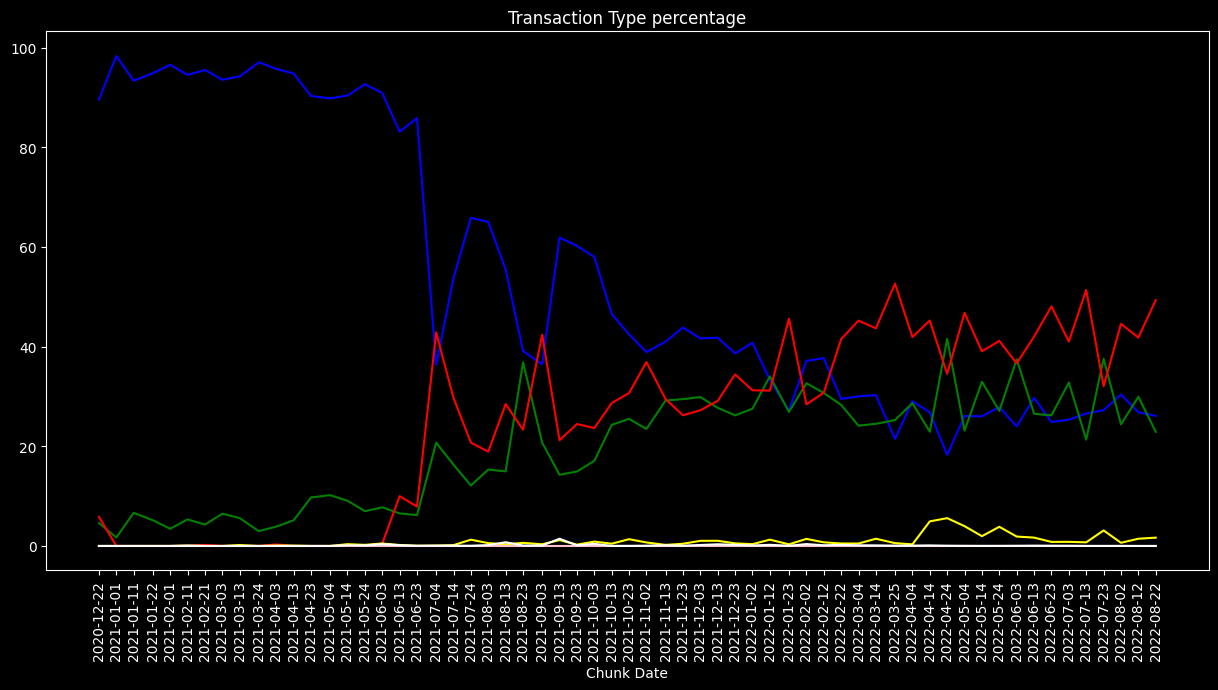

In [44]:
pay_percentage = transaction_type_percentages_of_total_transactions[0]
axfer_percentage = transaction_type_percentages_of_total_transactions[1]
appl_percentage = transaction_type_percentages_of_total_transactions[2]
acfg_percentage = transaction_type_percentages_of_total_transactions[3]
keyreg_percentage = transaction_type_percentages_of_total_transactions[4]
afrz_percentage = transaction_type_percentages_of_total_transactions[5]

# plt.plot(chunk_dates, created_apps, color = 'blz'
sb.lineplot(x = chunk_dates, y = pay_percentage, color = 'blue')
sb.lineplot(x = chunk_dates, y = axfer_percentage, color = 'green')
sb.lineplot(x = chunk_dates, y = appl_percentage, color = 'red')
sb.lineplot(x = chunk_dates, y = acfg_percentage, color = 'yellow')
sb.lineplot(x = chunk_dates, y = keyreg_percentage, color = 'pink')
sb.lineplot(x = chunk_dates, y = afrz_percentage, color = 'white')


plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.xlabel('Chunk Date')
plt.title('Transaction Type percentage')
plt.show()


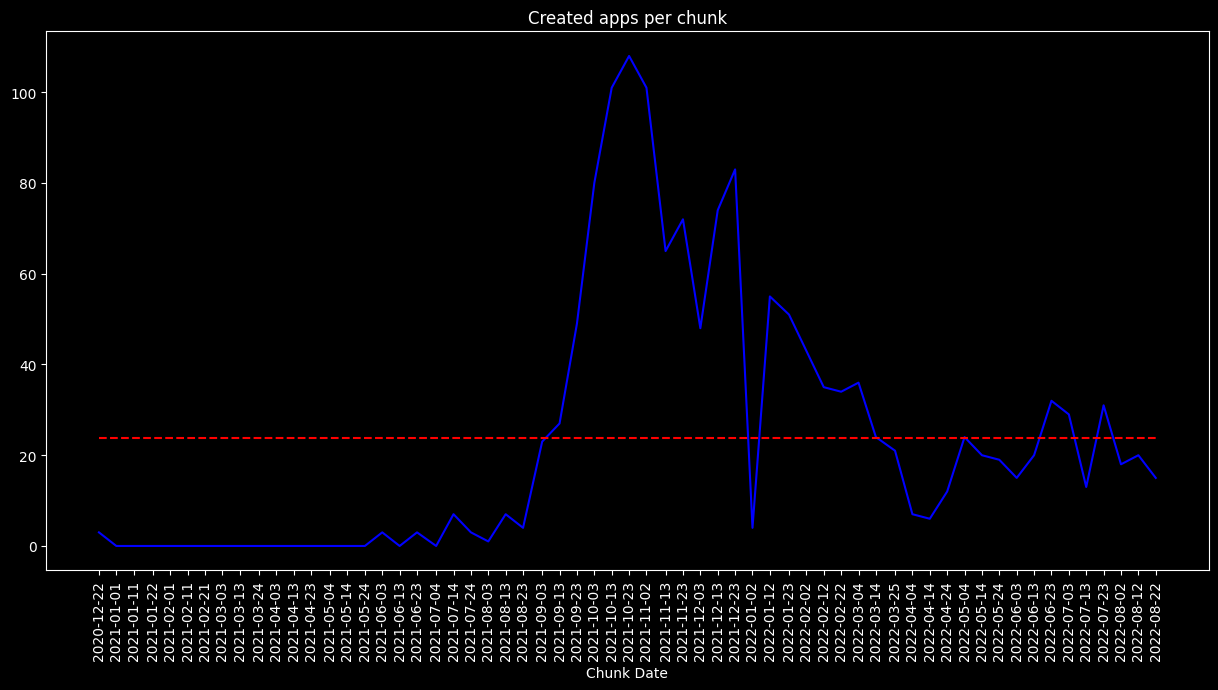

In [10]:


# plt.plot(chunk_dates, created_apps, color = 'blz'
sb.lineplot(x = chunk_dates, y = created_apps, color = 'blue')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(created_apps))*np.ones(61), color = 'red', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.xlabel('Chunk Date')
plt.title('Created apps per chunk')
plt.show()


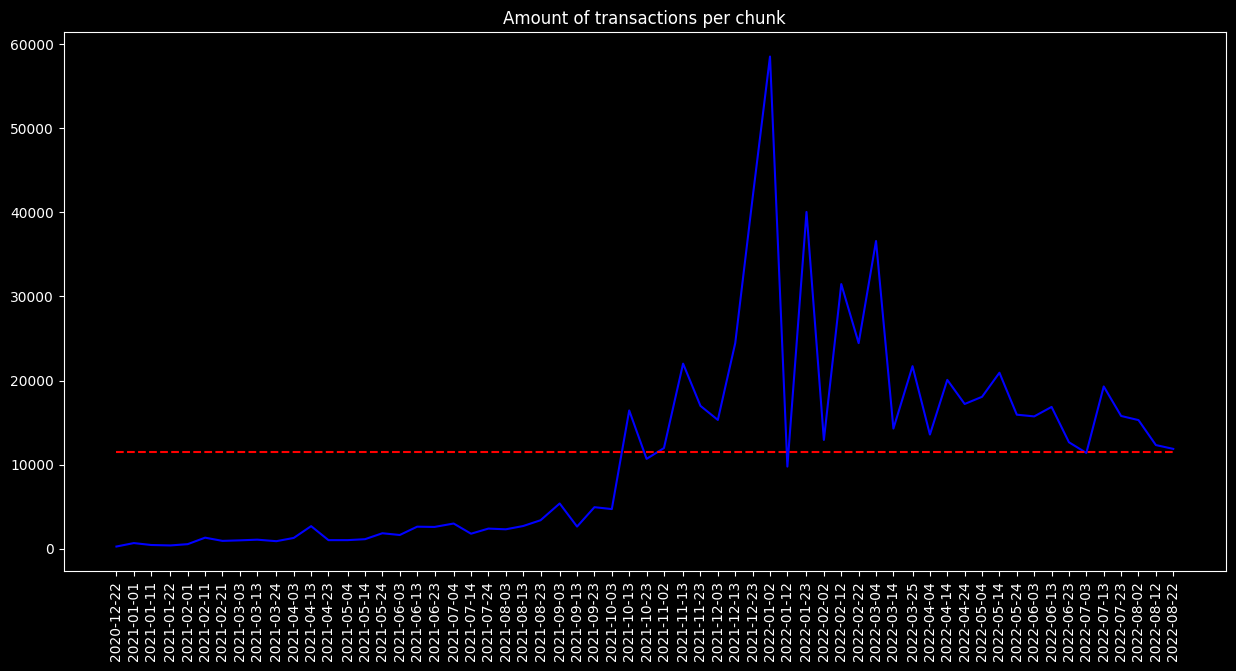

In [11]:
sb.lineplot(x = chunk_dates, y = np.array(total_transaction_amount), color = 'blue')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(total_transaction_amount))*np.ones(61), color = 'red', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Amount of transactions per chunk')
plt.show()

Text(0.5, 1.0, 'Total amount of senders per chunk')

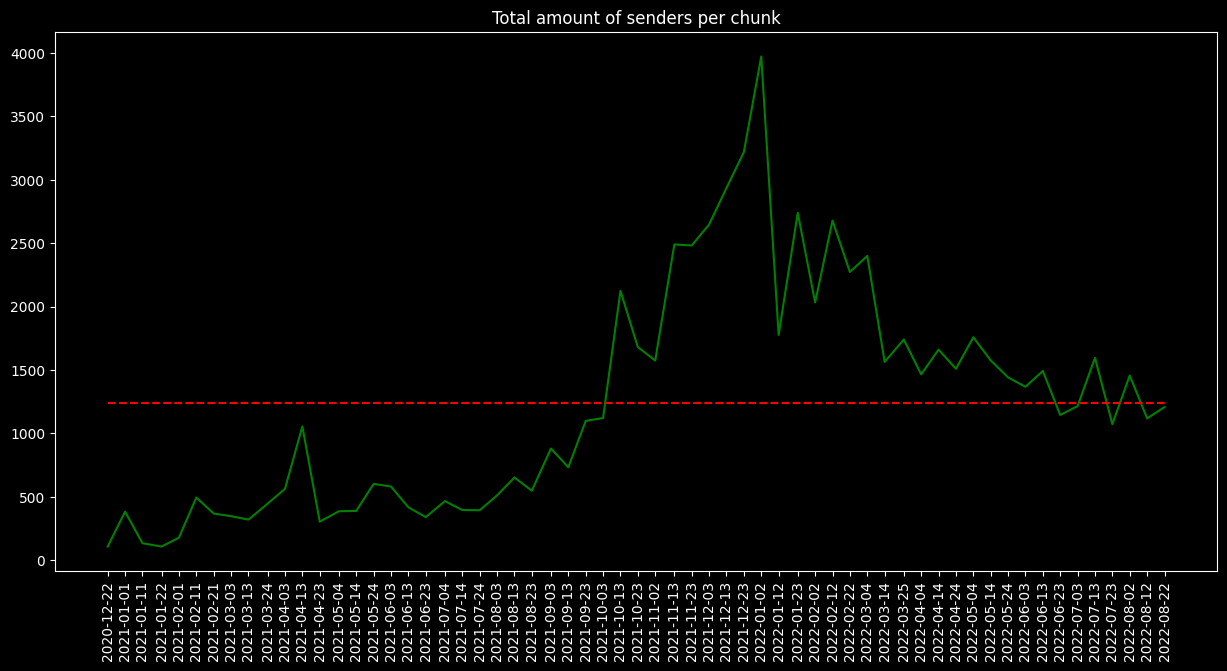

In [12]:
sb.lineplot(x = chunk_dates, y = np.array(total_sender_number), color = 'green')
sb.lineplot(x =chunk_dates, y = np.mean(np.array(total_sender_number))*np.ones(len(total_sender_number)), color = 'red', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Total amount of senders per chunk')

Text(0.5, 1.0, 'Total amount of receivers per chunk')

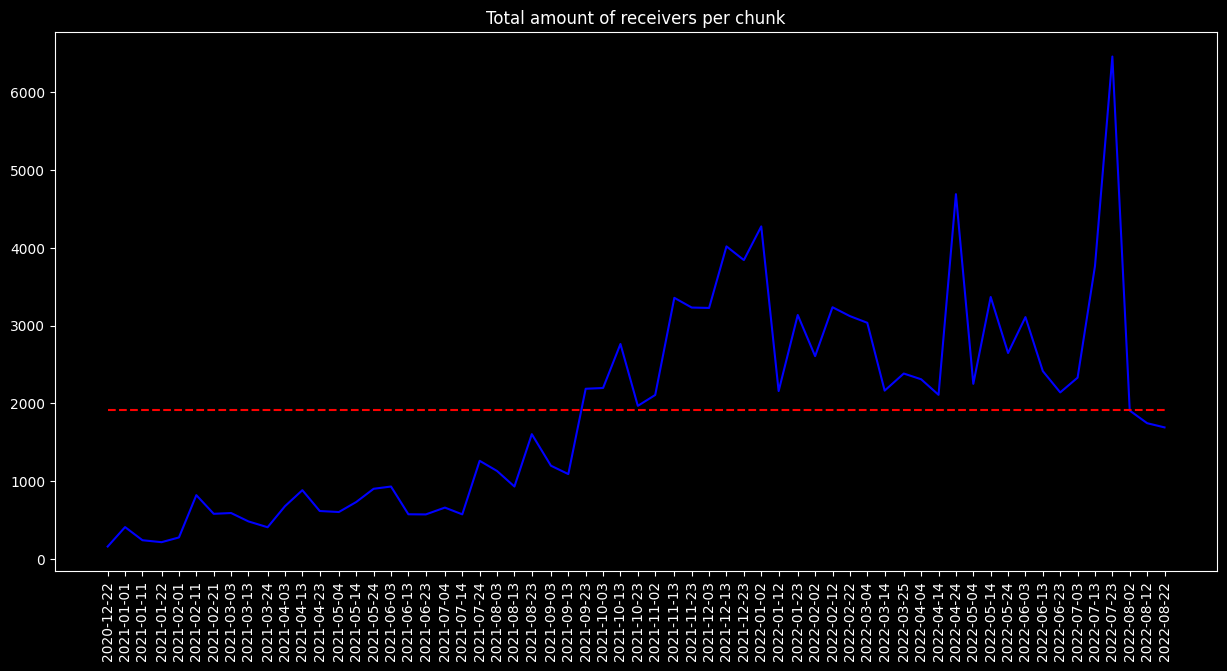

In [13]:
sb.lineplot(x = chunk_dates, y = np.array(total_receiver_number), color = 'blue')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(total_receiver_number))*np.ones(len(total_receiver_number)), color = 'red', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Total amount of receivers per chunk')

Text(0.5, 1.0, 'Total active accounts per chunk')

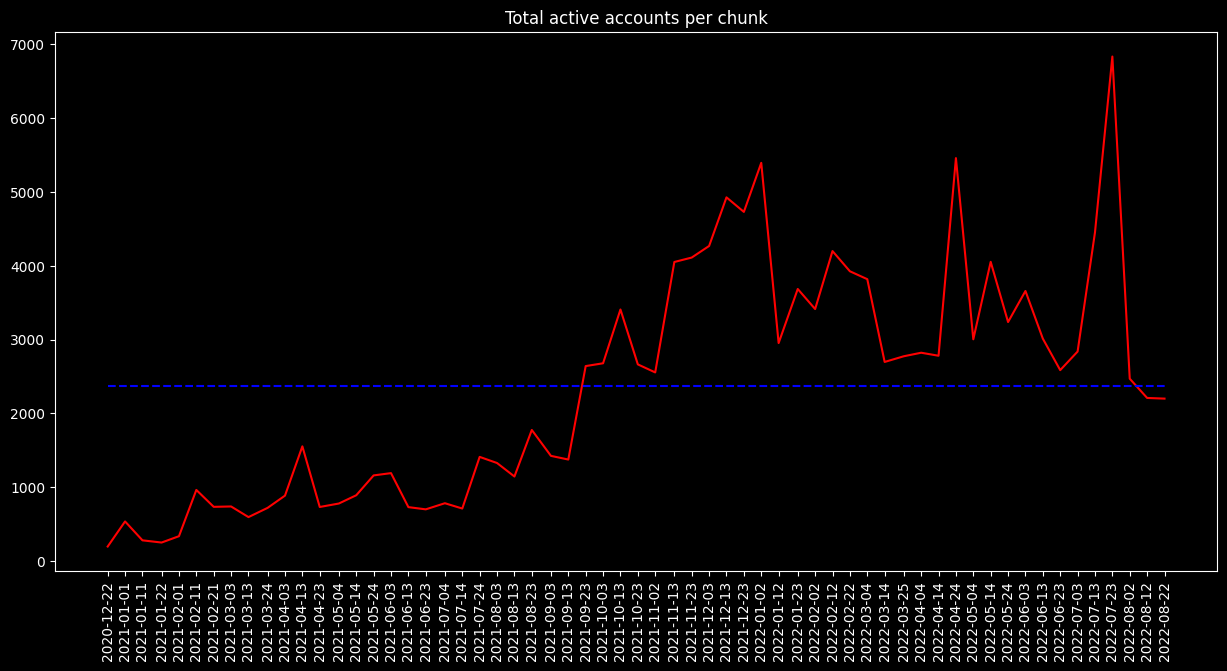

In [14]:
sb.lineplot(x = chunk_dates, y = np.array(total_active_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(total_active_accounts))*np.ones(len(total_active_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Total active accounts per chunk')

Text(0.5, 1.0, 'Mean transaction amount per sender per chunk')

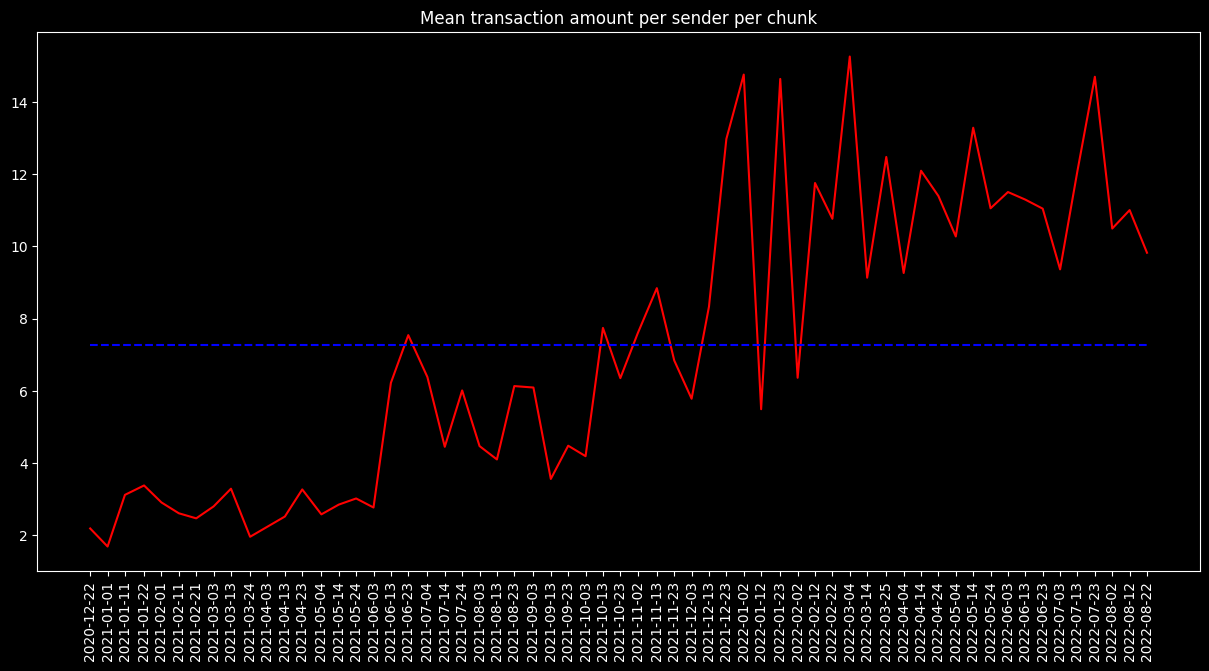

In [15]:
sb.lineplot(x = chunk_dates, y = np.array(mean_transaction_amount_per_sender), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(mean_transaction_amount_per_sender))*np.ones(len(mean_transaction_amount_per_sender)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Mean transaction amount per sender per chunk')

Text(0.5, 1.0, 'Mean transaction amount per receiver per chunk')

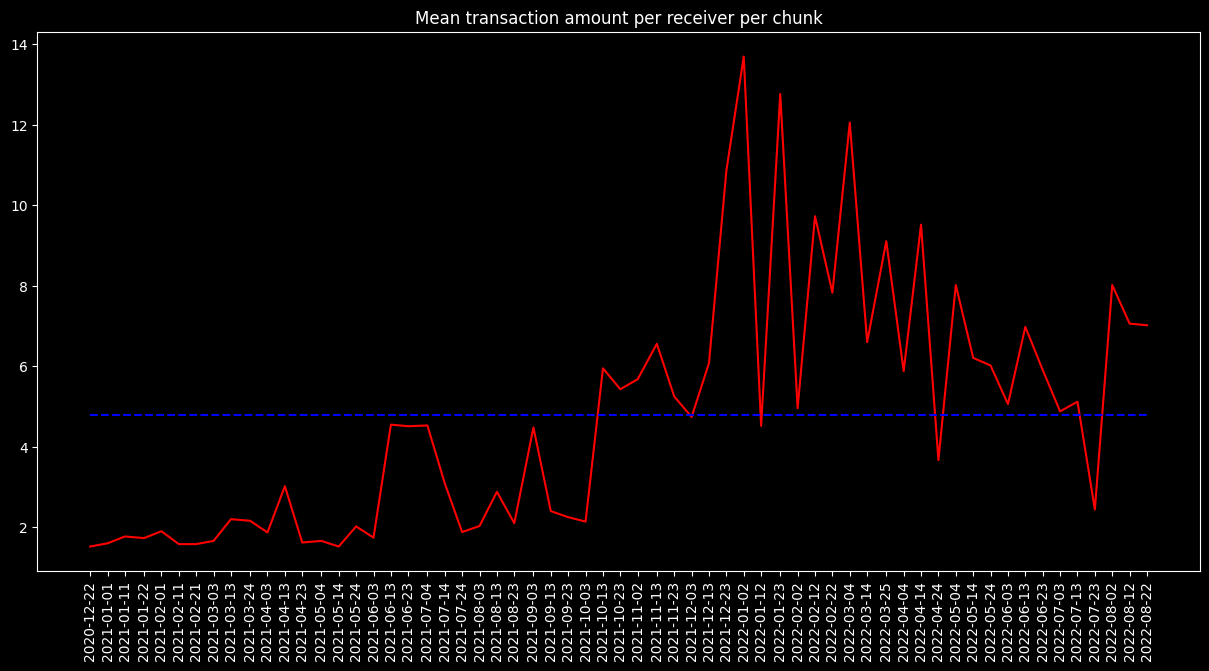

In [16]:
sb.lineplot(x = chunk_dates, y = np.array(mean_transaction_amount_per_receiver), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(mean_transaction_amount_per_receiver))*np.ones(len(mean_transaction_amount_per_receiver)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Mean transaction amount per receiver per chunk')

Text(0.5, 1.0, 'Mean amount of unique receivers for sender per chunk')

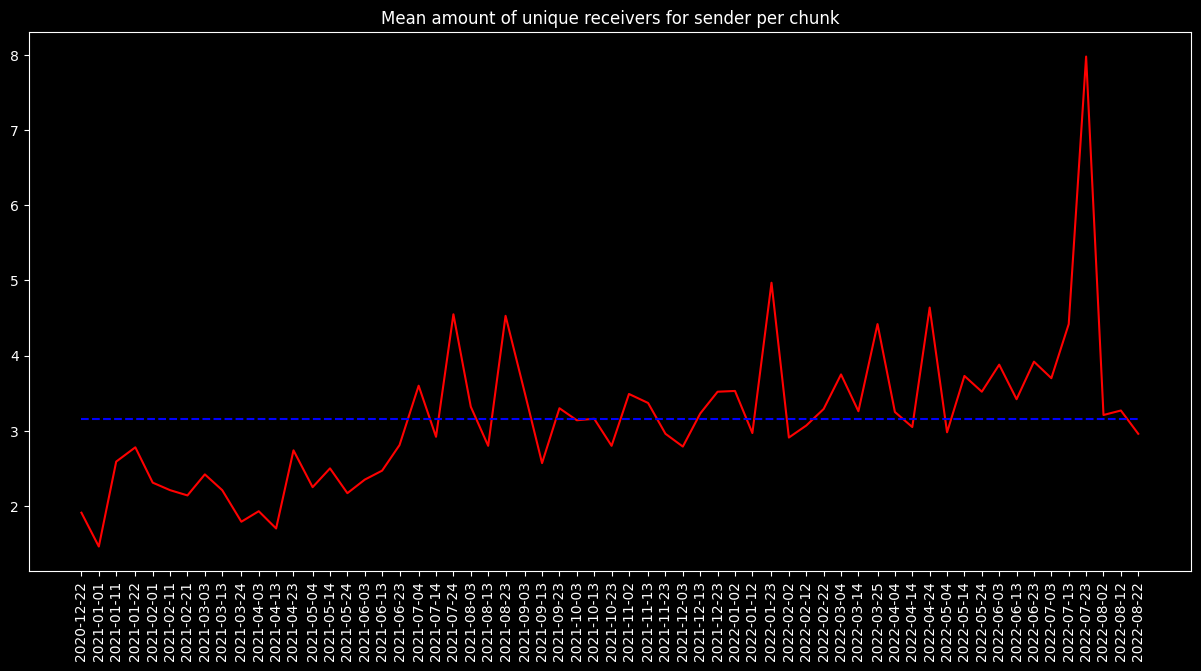

In [17]:
sb.lineplot(x = chunk_dates, y = np.array(mean_amount_of_unique_receiver_for_sender), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(mean_amount_of_unique_receiver_for_sender))*np.ones(len(mean_amount_of_unique_receiver_for_sender)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Mean amount of unique receivers for sender per chunk')

Text(0.5, 1.0, 'Mean amount of unique sender for receiver per chunk')

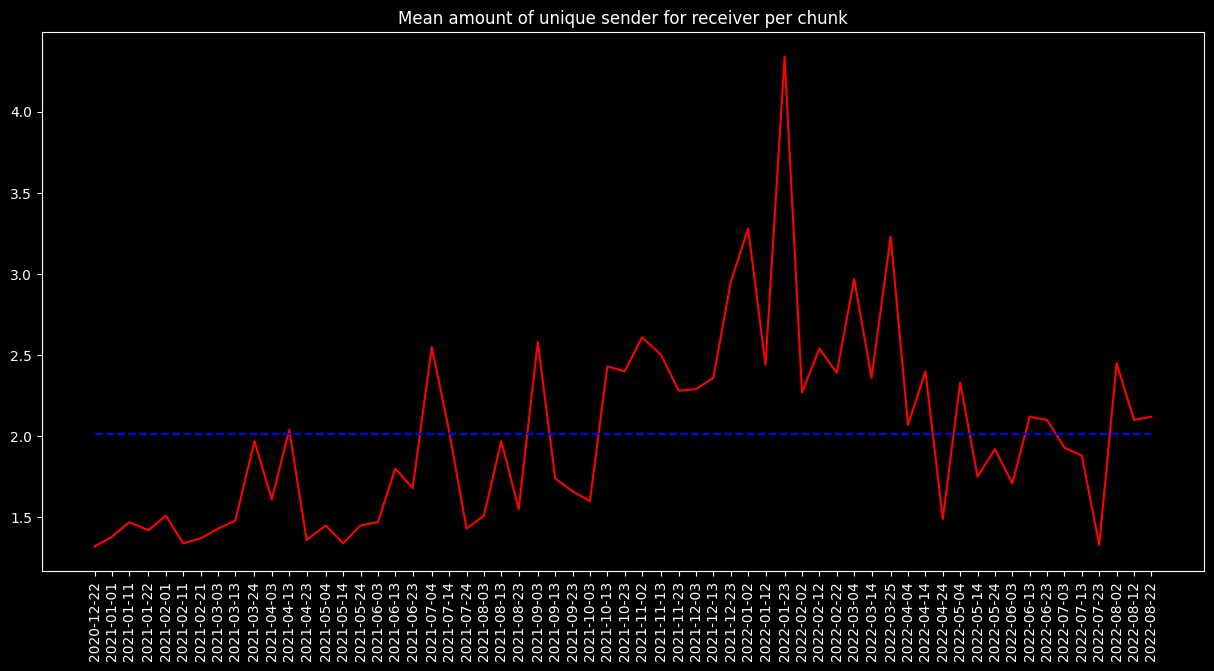

In [18]:
sb.lineplot(x = chunk_dates, y = np.array(mean_amount_of_unique_sender_for_receiver), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(mean_amount_of_unique_sender_for_receiver))*np.ones(len(mean_amount_of_unique_sender_for_receiver)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Mean amount of unique sender for receiver per chunk')

Text(0.5, 1.0, 'Only sender accounts per chunk')

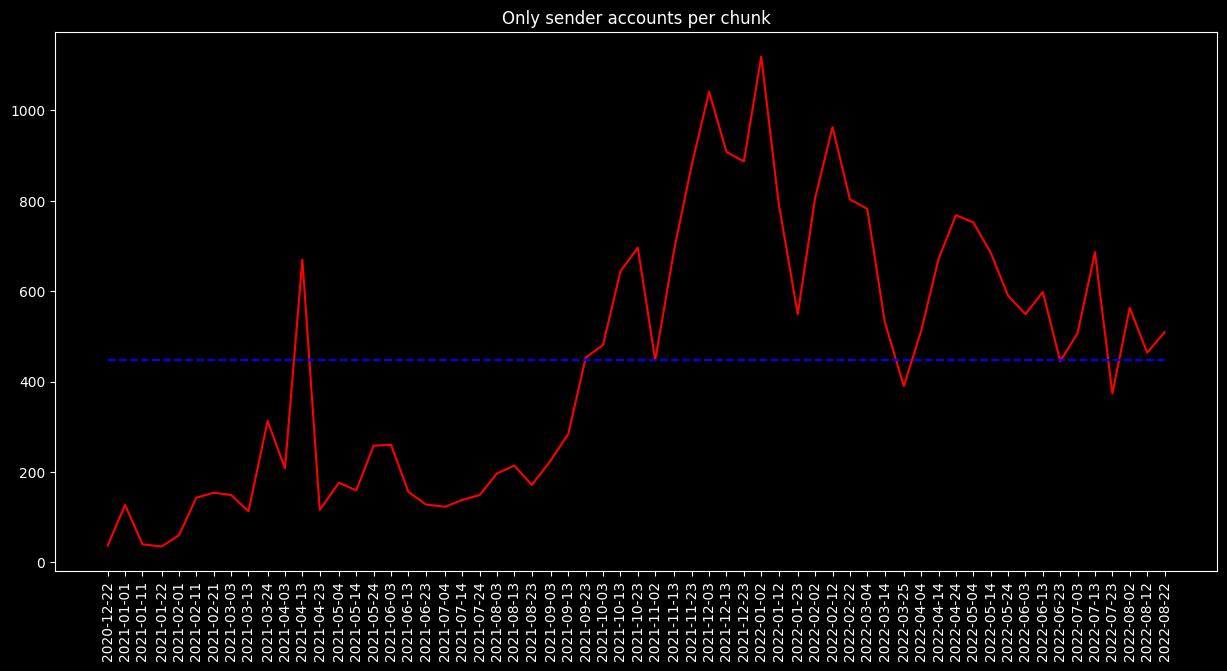

In [19]:
sb.lineplot(x = chunk_dates, y = np.array(only_sender_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(only_sender_accounts))*np.ones(len(only_sender_accounts)), color = 'blue', linestyle = 'dashed')

plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Only sender accounts per chunk')

Text(0.5, 1.0, 'Only receiver accounts per chunk')

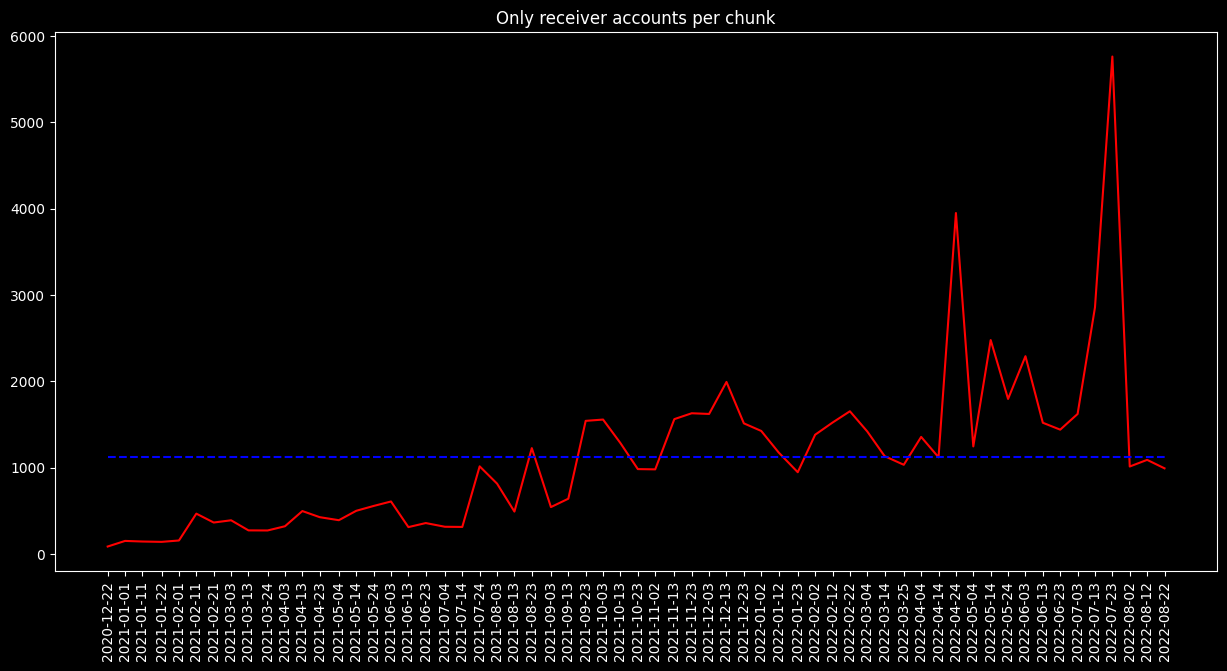

In [20]:
sb.lineplot(x = chunk_dates, y = np.array(only_receiver_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(only_receiver_accounts))*np.ones(len(only_receiver_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Only receiver accounts per chunk')

Text(0.5, 1.0, 'Percent of senders who are only senders per chunk')

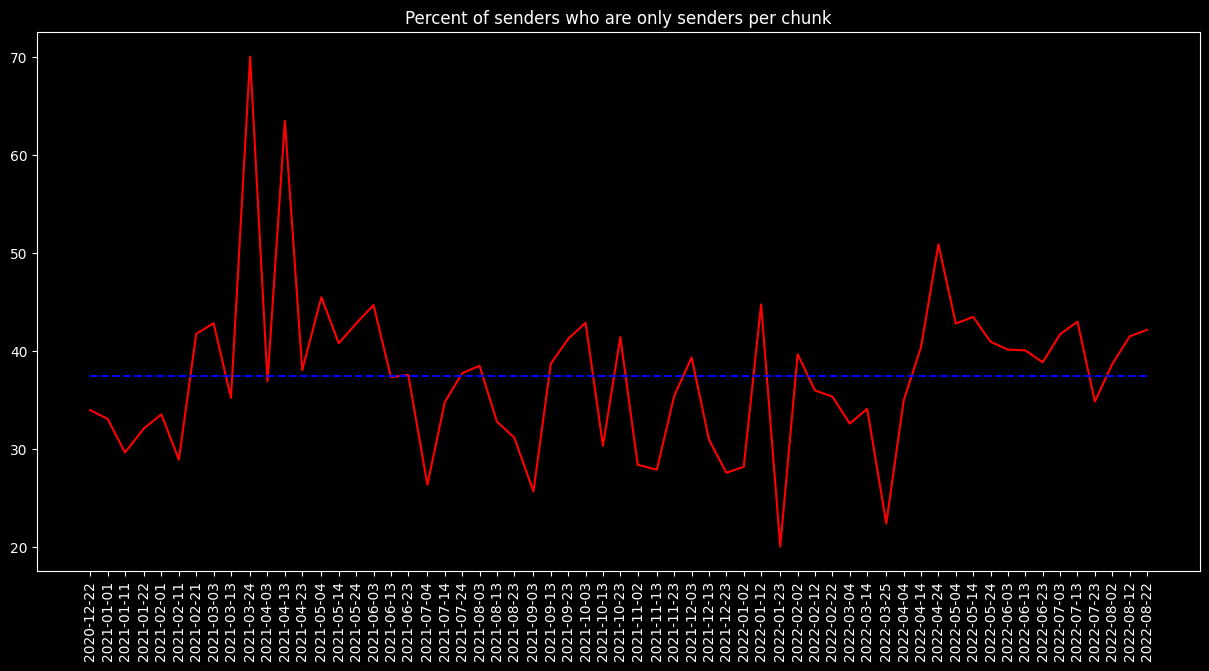

In [21]:
sb.lineplot(x = chunk_dates, y = np.array(percent_of_senders_only_senders), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(percent_of_senders_only_senders))*np.ones(len(percent_of_senders_only_senders)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Percent of senders who are only senders per chunk')

Text(0.5, 1.0, 'Percent of receivers who are only receivers per chunk')

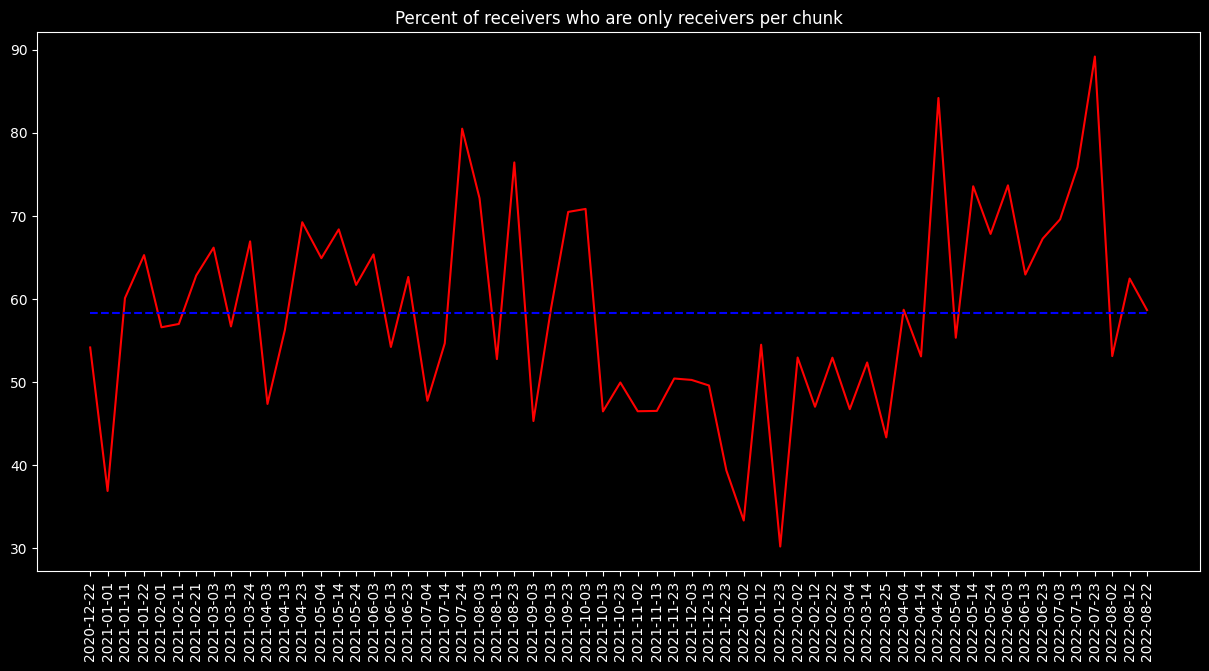

In [22]:
sb.lineplot(x = chunk_dates, y = np.array(percent_of_receivers_only_receivers), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(percent_of_receivers_only_receivers))*np.ones(len(percent_of_receivers_only_receivers)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Percent of receivers who are only receivers per chunk')

Text(0.5, 1.0, 'Percent of total accounts who are only senders per chunk')

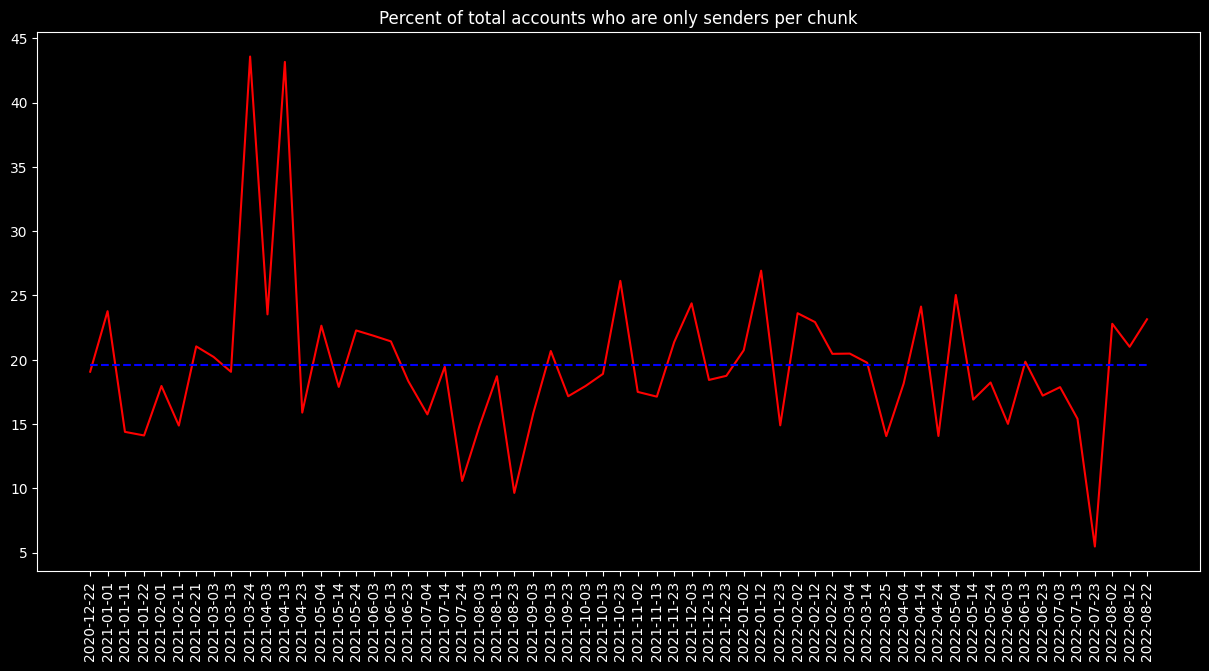

In [23]:
sb.lineplot(x = chunk_dates, y = np.array(percent_of_accounts_only_senders), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(percent_of_accounts_only_senders))*np.ones(len(percent_of_accounts_only_senders)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Percent of total accounts who are only senders per chunk')

Text(0.5, 1.0, 'Percent of total accounts who are only receivers per chunk')

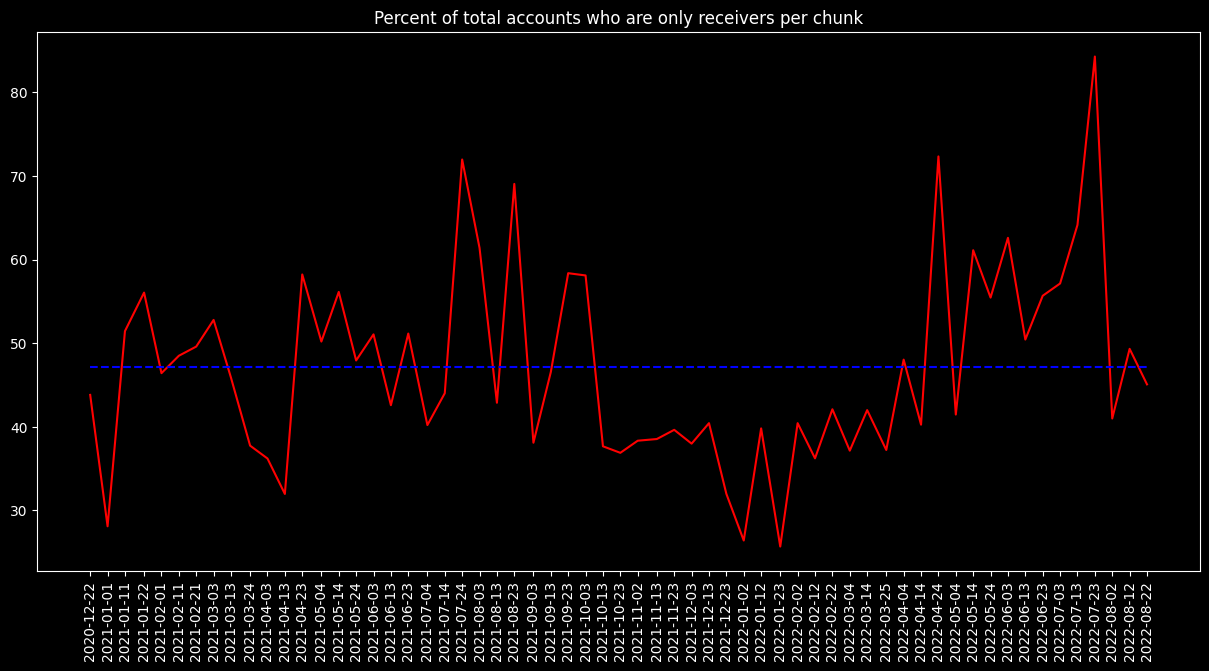

In [24]:
sb.lineplot(x = chunk_dates, y = np.array(percent_of_accounts_only_receivers), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(percent_of_accounts_only_receivers))*np.ones(len(percent_of_accounts_only_receivers)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Percent of total accounts who are only receivers per chunk')

Text(0.5, 1.0, 'Sender average transacted accounts per chunk')

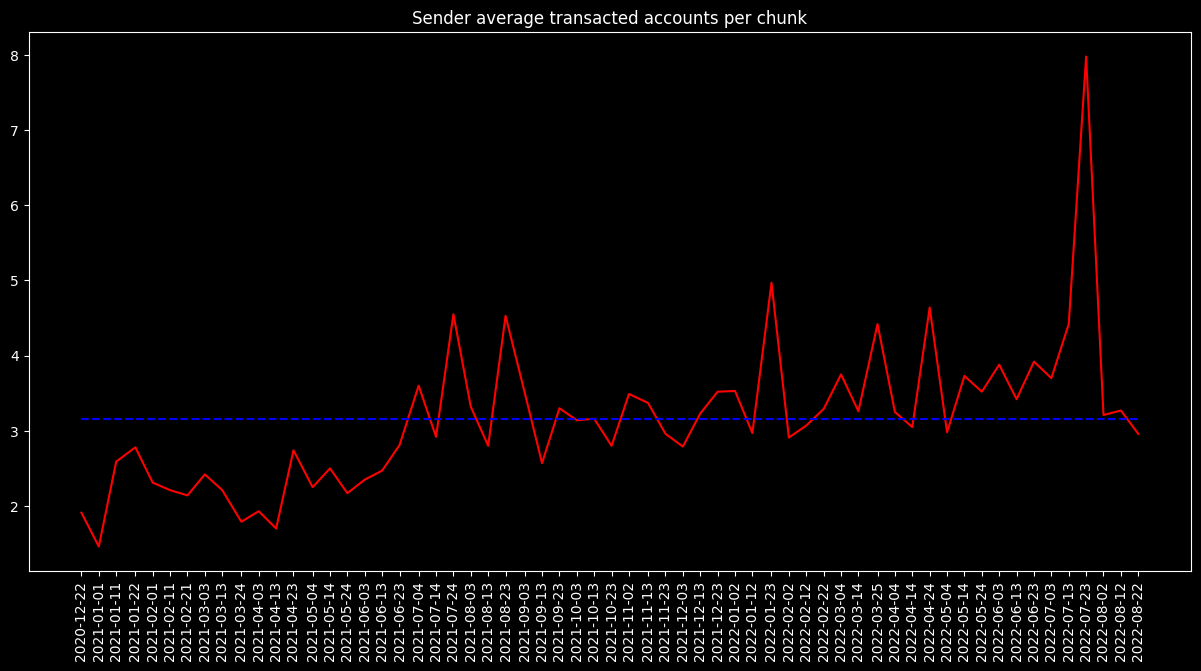

In [25]:
sb.lineplot(x = chunk_dates, y = np.array(sender_average_transacted_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(sender_average_transacted_accounts))*np.ones(len(sender_average_transacted_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Sender average transacted accounts per chunk')

Text(0.5, 1.0, 'Receiver average transacted accounts per chunk')

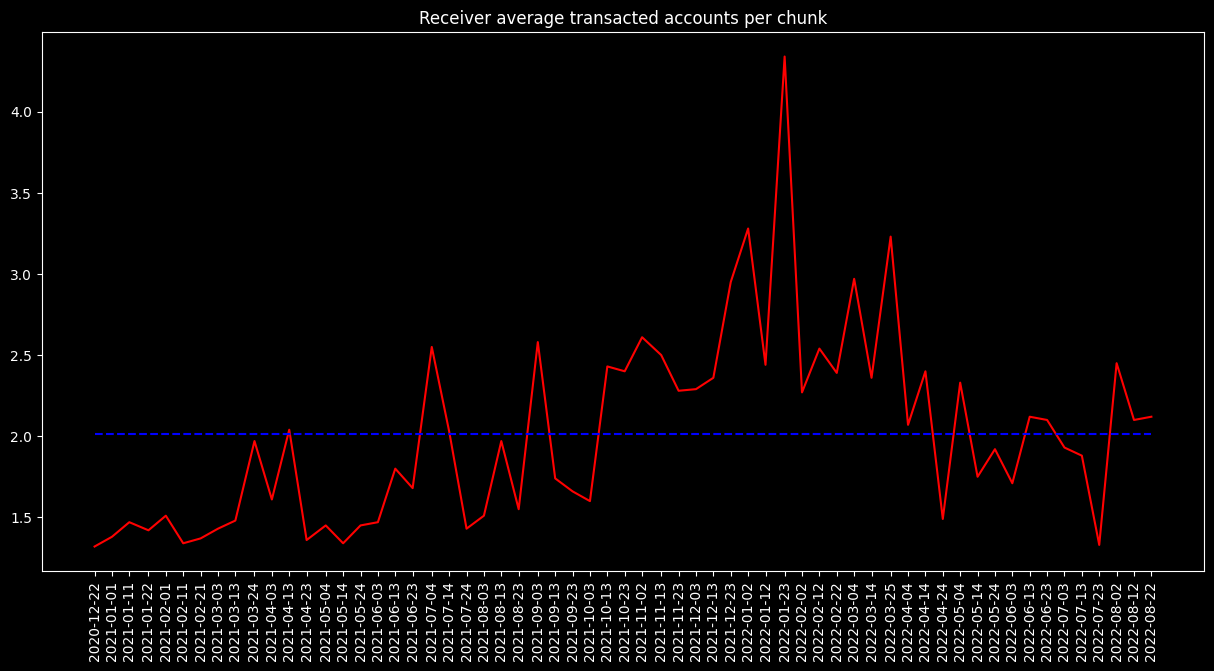

In [26]:
sb.lineplot(x = chunk_dates, y = np.array(receiver_average_transacted_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(receiver_average_transacted_accounts))*np.ones(len(receiver_average_transacted_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Receiver average transacted accounts per chunk')

Text(0.5, 1.0, 'Sender average transactions with same account per chunk')

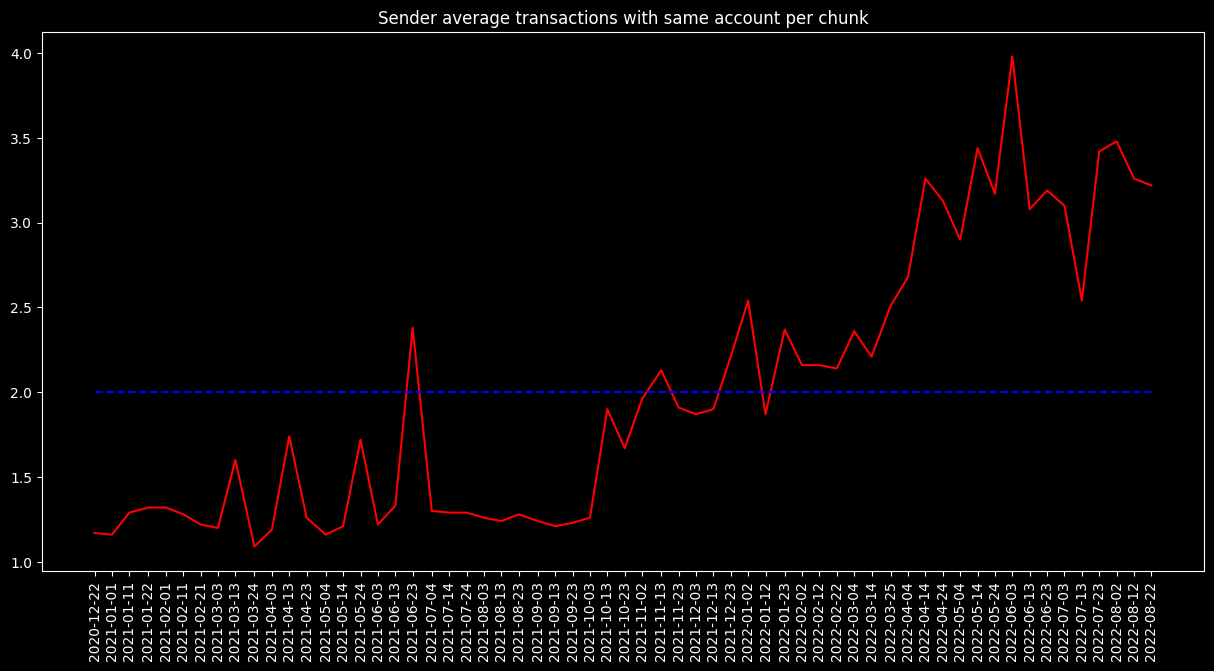

In [27]:
sb.lineplot(x = chunk_dates, y = np.array(sender_average_transacted_with_same_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(sender_average_transacted_with_same_accounts))*np.ones(len(sender_average_transacted_with_same_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Sender average transactions with same account per chunk')

Text(0.5, 1.0, 'Receiver average transactions with same account per chunk')

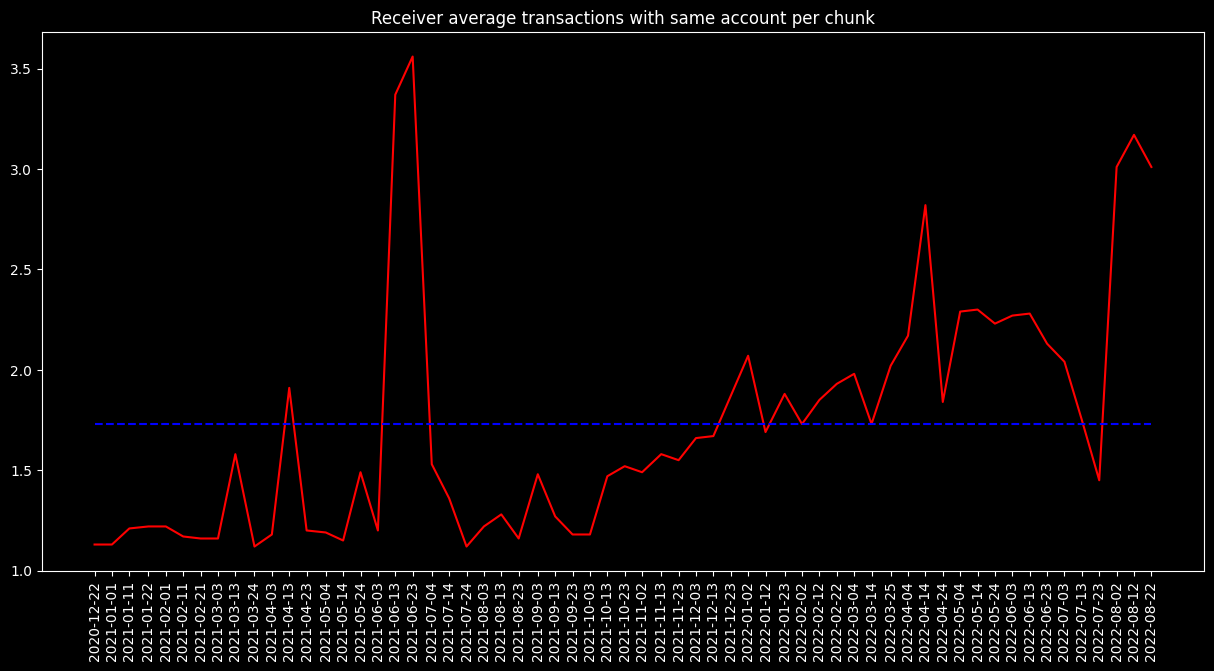

In [28]:
sb.lineplot(x = chunk_dates, y = np.array(receiver_average_transacted_with_same_accounts), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(receiver_average_transacted_with_same_accounts))*np.ones(len(receiver_average_transacted_with_same_accounts)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Receiver average transactions with same account per chunk')

In [29]:
most_frequent_ids
# sb.lineplot(np.array(most_frequent_ids))
# plt.xticks(np.arange(0,15, step = 1))
# plt.grid(True)
# plt.title('Most frequent ids per chunk')

[[64526857, 31566704],
 [64526857, 31566704],
 [31566704, 64526857, 6547014],
 [31566704, 64526857],
 [31566704, 64526857, 83209012],
 [31566704, 64526857, 312769, 438833, 6547014, 126946580],
 [31566704, 64526857, 27165954],
 [142838028,
  31566704,
  64526857,
  135464366,
  312769,
  1942776,
  3478242,
  27165954],
 [31566704,
  152246690,
  135464366,
  64526857,
  6547014,
  142838028,
  143787817,
  153084699,
  153093028],
 [31566704, 64526857, 153167847, 175940559, 152246690],
 [312769, 31566704, 64526857, 135464366, 184315089],
 [31566704,
  188185707,
  135464366,
  64526857,
  188506935,
  145078554,
  188289345,
  188221189,
  312769,
  188205942],
 [135464366,
  31566704,
  188185707,
  145078554,
  64526857,
  188262227,
  312769,
  188205942,
  199155948,
  188506935],
 [188185707,
  31566704,
  145078554,
  205947116,
  188205942,
  64526857,
  188506935,
  312769,
  6547014,
  205402116],
 [197112469,
  31566704,
  216485729,
  64526857,
  216494224,
  6547014,
  2751

In [30]:
percentage_of_total_transactions_per_asset

[array([57.14285714, 42.85714286]),
 array([57.14285714, 42.85714286]),
 array([70.83333333, 16.66666667, 12.5       ]),
 array([53.84615385, 46.15384615]),
 array([64.28571429, 28.57142857,  7.14285714]),
 array([82.53968254,  9.52380952,  3.17460317,  1.58730159,  1.58730159,
         1.58730159]),
 array([78.78787879, 18.18181818,  3.03030303]),
 array([49.15254237, 27.11864407,  6.77966102,  6.77966102,  5.08474576,
         1.69491525,  1.69491525,  1.69491525]),
 array([40., 22., 16.,  8.,  4.,  4.,  2.,  2.,  2.]),
 array([54.54545455, 18.18181818, 13.63636364,  9.09090909,  4.54545455]),
 array([55.55555556, 28.88888889,  8.88888889,  4.44444444,  2.22222222]),
 array([29.59183673, 15.30612245, 13.26530612,  6.12244898,  6.12244898,
         5.10204082,  5.10204082,  4.08163265,  3.06122449,  3.06122449]),
 array([34.40860215, 22.58064516,  8.60215054,  7.52688172,  4.30107527,
         4.30107527,  3.22580645,  3.22580645,  2.15053763,  2.15053763]),
 array([16.66666667, 11.45

In [31]:
unique_senders_per_asset

[[1, 2],
 [1, 2],
 [3, 1, 3],
 [2, 1],
 [2, 1, 1],
 [9, 1, 1, 1, 1, 1],
 [3, 1, 1],
 [3, 4, 1, 1, 3, 1, 1, 1],
 [5, 1, 1, 1, 1, 2, 1, 1, 1],
 [3, 1, 1, 1, 1],
 [4, 5, 1, 1, 1],
 [5, 6, 1, 1, 4, 1, 3, 4, 2, 1],
 [1, 6, 5, 4, 1, 1, 3, 1, 1, 1],
 [4, 3, 2, 1, 2, 1, 4, 2, 2, 2],
 [2, 7, 2, 1, 1, 3, 2, 1, 1, 1],
 [7, 1, 2, 3, 3, 1, 3, 1, 1, 1],
 [5, 1, 2, 1, 2, 2, 2, 1, 1, 1],
 [40, 1, 4, 1, 1, 2, 1, 1, 1, 2],
 [20, 1, 1, 2, 1, 1, 2, 2, 1, 1],
 [204, 9, 2, 1, 3, 2, 2, 1, 1, 1],
 [89, 4, 8, 6, 1, 1, 1, 1, 1, 1],
 [75, 1, 6, 8, 7, 1, 1, 1, 1, 2],
 [78, 9, 1, 6, 5, 1, 2, 2, 3, 2],
 [120, 8, 1, 8, 1, 3, 2, 1, 2, 1],
 [2, 126, 5, 1, 3, 2, 1, 2, 1, 2],
 [353, 1, 1, 5, 1, 1, 3, 1, 1, 2],
 [76, 14, 7, 10, 1, 1, 1, 1, 1, 1],
 [151, 50, 30, 17, 7, 19, 9, 11, 3, 1],
 [123, 3, 30, 2, 17, 2, 2, 2, 3, 3],
 [385, 165, 125, 20, 30, 34, 14, 62, 17, 14],
 [237, 65, 53, 13, 32, 16, 32, 11, 28, 2],
 [268, 116, 94, 55, 50, 18, 25, 10, 10, 5],
 [280, 126, 62, 93, 39, 43, 132, 38, 29, 9],
 [199, 77, 68, 12, 59, 1

Text(0.5, 1.0, 'One Algo transactions per chunk')

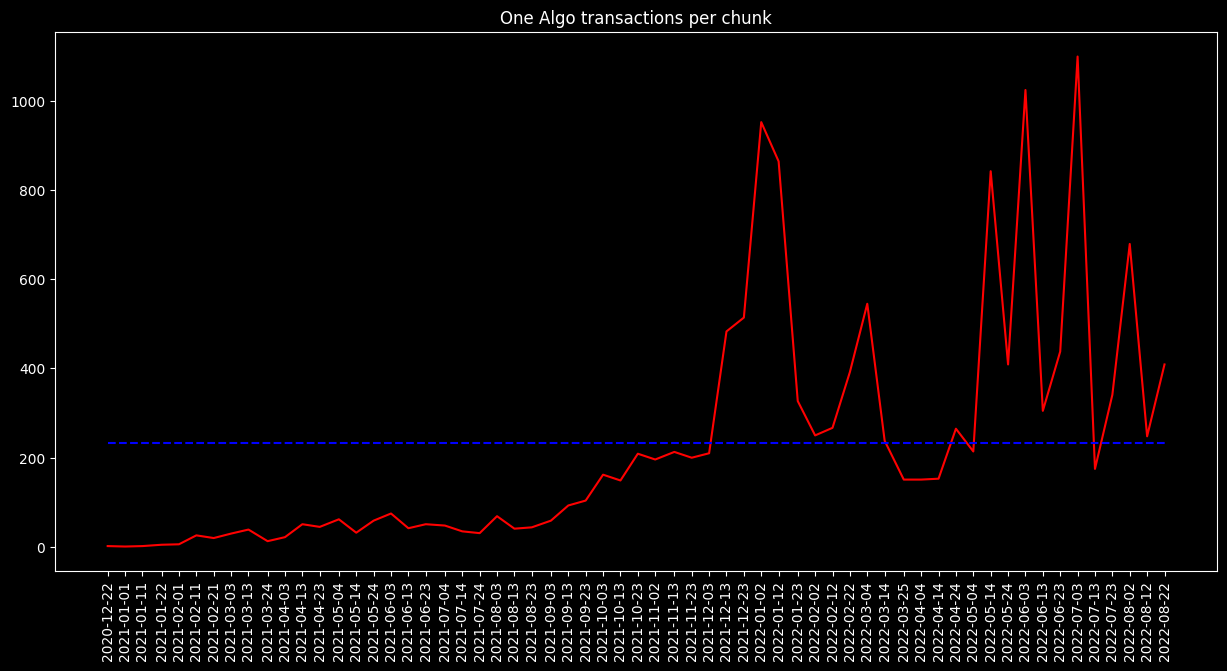

In [32]:
sb.lineplot(x = chunk_dates, y = np.array(transactions_one_algo), color = 'red')
sb.lineplot(x = chunk_dates, y = np.mean(np.array(transactions_one_algo))*np.ones(len(transactions_one_algo)), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('One Algo transactions per chunk')

C:\Users\juane\AppData\Local\Temp\ipykernel_18984\636266159.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\636266159.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\636266159.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\636266159.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\636266159.py:58: UserWarning: FixedFormatter should only be used toget

[Text(-10.0, 0, '2020-12-22'),
 Text(0.0, 0, '2021-01-01'),
 Text(10.0, 0, '2021-01-11'),
 Text(20.0, 0, '2021-01-22'),
 Text(30.0, 0, '2021-02-01'),
 Text(40.0, 0, '2021-02-11'),
 Text(50.0, 0, '2021-02-21'),
 Text(60.0, 0, '2021-03-03'),
 Text(70.0, 0, '2021-03-13')]

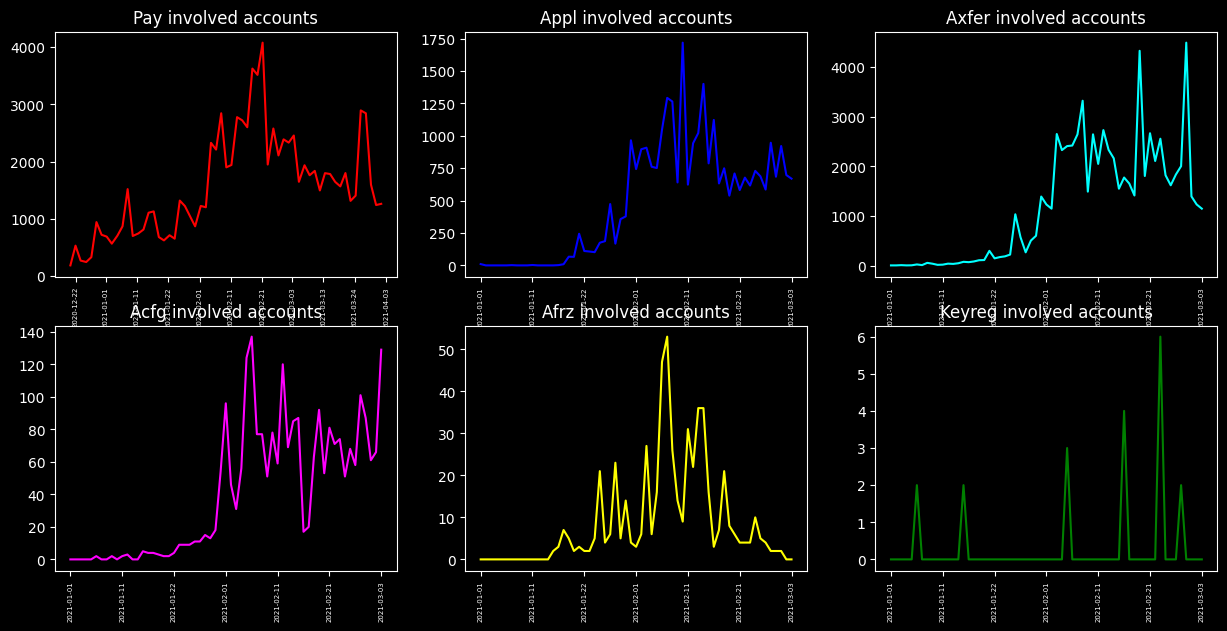

In [33]:
involved_accounts_per_type
pay_involved_accounts = []
appl_involved_accounts = []
axfer_involved_accounts = []
acfg_involved_accounts = []
keyreg_involved_accounts = []
afrz_involved_accounts = []

for i in range(len(involved_accounts_per_type)):
    if 'pay' in involved_accounts_per_type[i]:
        pay_involved_accounts.append(involved_accounts_per_type[i]['pay'])
    else:
        pay_involved_accounts.append(0)

    if 'appl' in involved_accounts_per_type[i]:
        appl_involved_accounts.append(involved_accounts_per_type[i]['appl'])
    else:
        appl_involved_accounts.append(0)
    if 'axfer' in involved_accounts_per_type[i]:
        axfer_involved_accounts.append(involved_accounts_per_type[i]['axfer'])
    else:
        axfer_involved_accounts.append(0)
    if 'acfg' in involved_accounts_per_type[i]:
        acfg_involved_accounts.append(involved_accounts_per_type[i]['acfg'])
    else:
        acfg_involved_accounts.append(0)
    if 'keyreg' in involved_accounts_per_type[i]:
        keyreg_involved_accounts.append(involved_accounts_per_type[i]['keyreg'])
    else:
        keyreg_involved_accounts.append(0)
    if 'afrz' in involved_accounts_per_type[i]:
        afrz_involved_accounts.append(involved_accounts_per_type[i]['afrz'])
    else:
        afrz_involved_accounts.append(0)
    

figure, axis = plt.subplots(2, 3)
# For Sine Function
axis[0, 0].plot(chunk_dates,pay_involved_accounts, color = 'red')
axis[0, 0].set_title("Pay involved accounts")
axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Cosine Function
axis[0, 1].plot(appl_involved_accounts, color = 'blue')
axis[0, 1].set_title("Appl involved accounts")
axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
# For Tangent Function
axis[0, 2].plot(axfer_involved_accounts, color = 'cyan')
axis[0, 2].set_title("Axfer involved accounts")
axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
# For Tanh Function
axis[1, 0].plot(acfg_involved_accounts, color = 'magenta')
axis[1, 0].set_title("Acfg involved accounts")
axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
# For Tangent Function
axis[1, 1].plot(afrz_involved_accounts, color = 'yellow')
axis[1, 1].set_title("Afrz involved accounts")
axis[1, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
# For Tanh Function
axis[1, 2].plot(keyreg_involved_accounts, color = 'green')
axis[1, 2].set_title("Keyreg involved accounts")
axis[1, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

C:\Users\juane\AppData\Local\Temp\ipykernel_18984\2571128979.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\2571128979.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\2571128979.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\2571128979.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\2571128979.py:62: UserWarning: FixedFormatter should only be used 

[Text(-10.0, 0, '2020-12-22'),
 Text(0.0, 0, '2021-01-01'),
 Text(10.0, 0, '2021-01-11'),
 Text(20.0, 0, '2021-01-22'),
 Text(30.0, 0, '2021-02-01'),
 Text(40.0, 0, '2021-02-11'),
 Text(50.0, 0, '2021-02-21'),
 Text(60.0, 0, '2021-03-03'),
 Text(70.0, 0, '2021-03-13')]

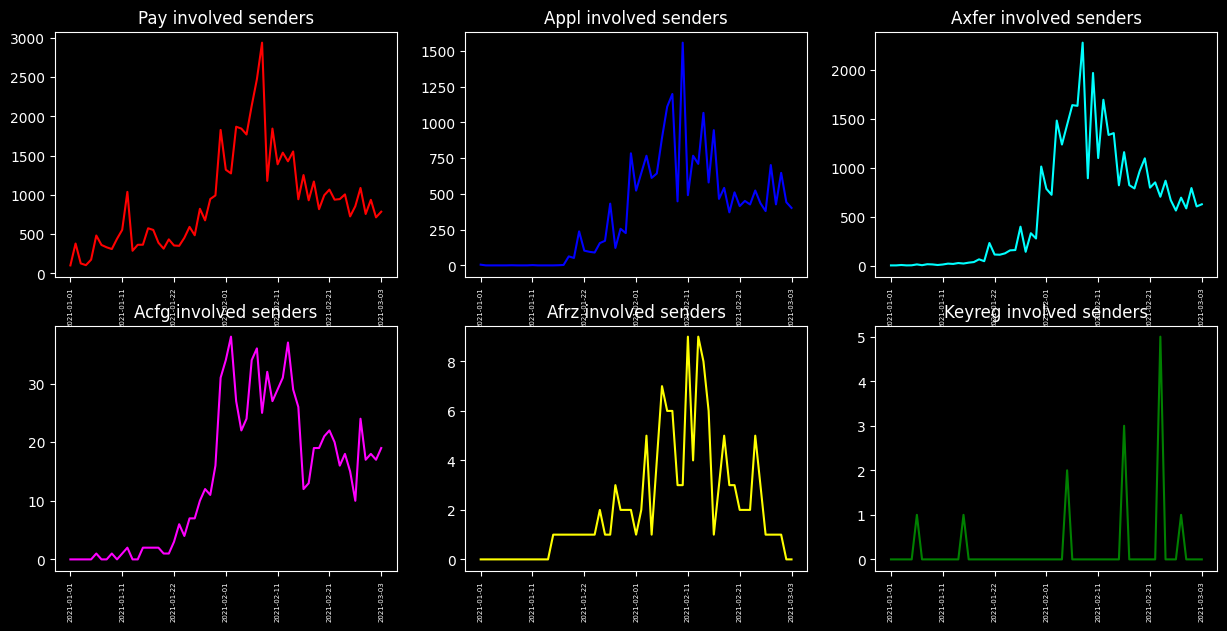

In [34]:
involved_senders_per_type
pay_involved_senders = []
appl_involved_senders = []
axfer_involved_senders = []
acfg_involved_senders = []
keyreg_involved_senders = []
afrz_involved_senders = []

for i in range(len(involved_senders_per_type)):
    if 'pay' in involved_senders_per_type[i]:
        pay_involved_senders.append(involved_senders_per_type[i]['pay'])
    else:
        pay_involved_senders.append(0)

    if 'appl' in involved_senders_per_type[i]:
        appl_involved_senders.append(involved_senders_per_type[i]['appl'])
    else:
        appl_involved_senders.append(0)
    if 'axfer' in involved_senders_per_type[i]:
        axfer_involved_senders.append(involved_senders_per_type[i]['axfer'])
    else:
        axfer_involved_senders.append(0)
    if 'acfg' in involved_senders_per_type[i]:
        acfg_involved_senders.append(involved_senders_per_type[i]['acfg'])
    else:
        acfg_involved_senders.append(0)
    if 'keyreg' in involved_senders_per_type[i]:
        keyreg_involved_senders.append(involved_senders_per_type[i]['keyreg'])
    else:
        keyreg_involved_senders.append(0)
    if 'afrz' in involved_senders_per_type[i]:
        afrz_involved_senders.append(involved_senders_per_type[i]['afrz'])
    else:
        afrz_involved_senders.append(0)


figure, axis = plt.subplots(2, 3)


axis[0, 0].plot(pay_involved_senders, color = 'red')
axis[0, 0].set_title("Pay involved senders")
axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')


axis[0, 1].plot(appl_involved_senders, color = 'blue')
axis[0, 1].set_title("Appl involved senders")
axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')


axis[0, 2].plot(axfer_involved_senders, color = 'cyan')
axis[0, 2].set_title("Axfer involved senders")
axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')


axis[1, 0].plot(acfg_involved_senders, color = 'magenta')
axis[1, 0].set_title("Acfg involved senders")
axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')


axis[1, 1].plot(afrz_involved_senders, color = 'yellow')
axis[1, 1].set_title("Afrz involved senders")
axis[1, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')


axis[1, 2].plot(keyreg_involved_senders, color = 'green')
axis[1, 2].set_title("Keyreg involved senders")
axis[1, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')



C:\Users\juane\AppData\Local\Temp\ipykernel_18984\1996834235.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\1996834235.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\1996834235.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\1996834235.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\1996834235.py:57: UserWarning: FixedFormatter should only be used 

[Text(-10.0, 0, '2020-12-22'),
 Text(0.0, 0, '2021-01-01'),
 Text(10.0, 0, '2021-01-11'),
 Text(20.0, 0, '2021-01-22'),
 Text(30.0, 0, '2021-02-01'),
 Text(40.0, 0, '2021-02-11'),
 Text(50.0, 0, '2021-02-21'),
 Text(60.0, 0, '2021-03-03'),
 Text(70.0, 0, '2021-03-13')]

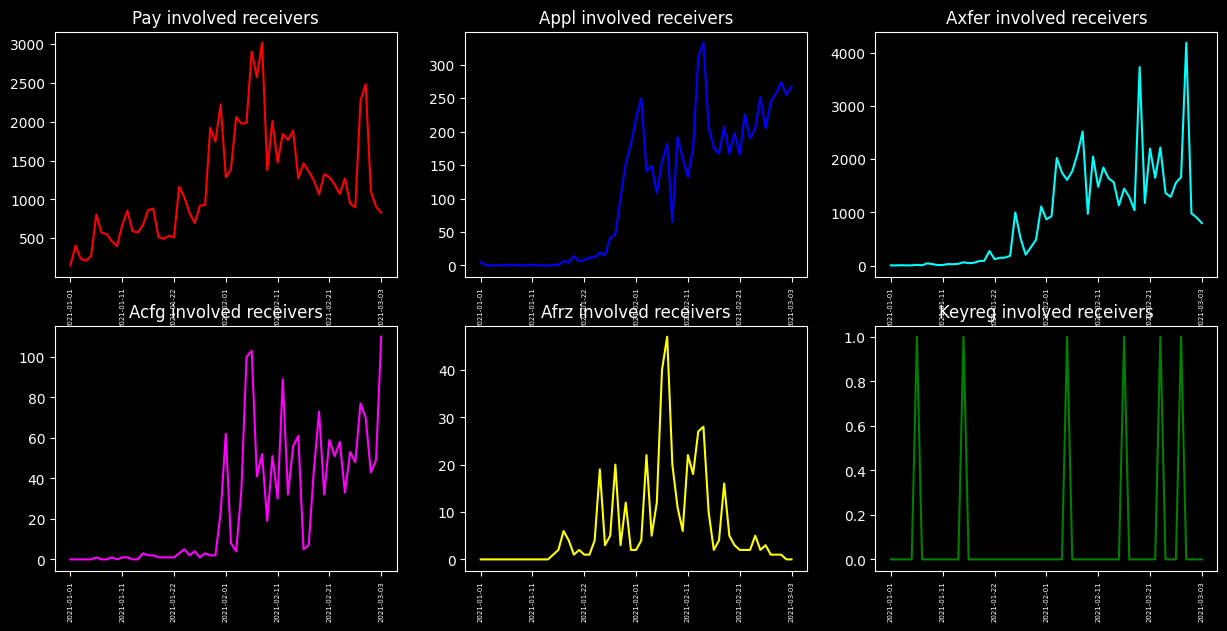

In [35]:
involved_receivers_per_type
pay_involved_receivers = []
appl_involved_receivers = []
axfer_involved_receivers = []
acfg_involved_receivers = []
keyreg_involved_receivers = []
afrz_involved_receivers = []

for i in range(len(involved_receivers_per_type)):
    if 'pay' in involved_receivers_per_type[i]:
        pay_involved_receivers.append(involved_receivers_per_type[i]['pay'])
    else:
        pay_involved_receivers.append(0)

    if 'appl' in involved_receivers_per_type[i]:
        appl_involved_receivers.append(involved_receivers_per_type[i]['appl'])
    else:
        appl_involved_receivers.append(0)
    if 'axfer' in involved_receivers_per_type[i]:
        axfer_involved_receivers.append(involved_receivers_per_type[i]['axfer'])
    else:
        axfer_involved_receivers.append(0)
    if 'acfg' in involved_receivers_per_type[i]:
        acfg_involved_receivers.append(involved_receivers_per_type[i]['acfg'])
    else:
        acfg_involved_receivers.append(0)
    if 'keyreg' in involved_receivers_per_type[i]:
        keyreg_involved_receivers.append(involved_receivers_per_type[i]['keyreg'])
    else:
        keyreg_involved_receivers.append(0)
    if 'afrz' in involved_receivers_per_type[i]:
        afrz_involved_receivers.append(involved_receivers_per_type[i]['afrz'])
    else:
        afrz_involved_receivers.append(0)
    

figure, axis = plt.subplots(2, 3)

axis[0, 0].plot(pay_involved_receivers, color = 'red')
axis[0, 0].set_title("Pay involved receivers")
axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

axis[0, 1].plot(appl_involved_receivers, color = 'blue')
axis[0, 1].set_title("Appl involved receivers")
axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

axis[0, 2].plot(axfer_involved_receivers, color = 'cyan')
axis[0, 2].set_title("Axfer involved receivers")
axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

axis[1, 0].plot(acfg_involved_receivers, color = 'magenta')
axis[1, 0].set_title("Acfg involved receivers")
axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

axis[1, 1].plot(afrz_involved_receivers, color = 'yellow')
axis[1, 1].set_title("Afrz involved receivers")
axis[1, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

axis[1, 2].plot(keyreg_involved_receivers, color = 'green')
axis[1, 2].set_title("Keyreg involved receivers")
axis[1, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')



C:\Users\juane\AppData\Local\Temp\ipykernel_18984\3220216217.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\3220216217.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\3220216217.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\3220216217.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')
C:\Users\juane\AppData\Local\Temp\ipykernel_18984\3220216217.py:60: UserWarning: FixedFormatter should only be used 

[Text(-10.0, 0, '2020-12-22'),
 Text(0.0, 0, '2021-01-01'),
 Text(10.0, 0, '2021-01-11'),
 Text(20.0, 0, '2021-01-22'),
 Text(30.0, 0, '2021-02-01'),
 Text(40.0, 0, '2021-02-11'),
 Text(50.0, 0, '2021-02-21'),
 Text(60.0, 0, '2021-03-03'),
 Text(70.0, 0, '2021-03-13')]

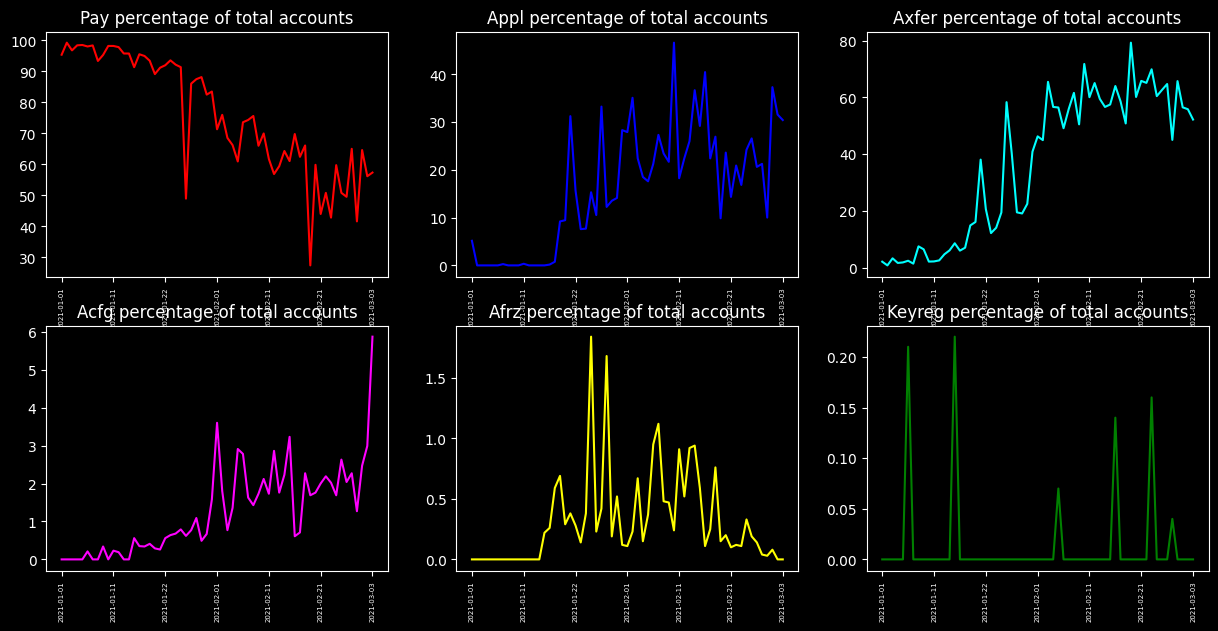

In [36]:
percentage_of_total_accounts_per_type
pay_percentage_of_total_accounts = []
appl_percentage_of_total_accounts = []
axfer_percentage_of_total_accounts = []
acfg_percentage_of_total_accounts = []
keyreg_percentage_of_total_accounts = []
afrz_percentage_of_total_accounts = []

for i in range(len(percentage_of_total_accounts_per_type)):
    if 'pay' in percentage_of_total_accounts_per_type[i]:
        pay_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['pay'])
    else:
        pay_percentage_of_total_accounts.append(0)

    if 'appl' in percentage_of_total_accounts_per_type[i]:
        appl_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['appl'])
    else:
        appl_percentage_of_total_accounts.append(0)
    if 'axfer' in percentage_of_total_accounts_per_type[i]:
        axfer_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['axfer'])
    else:
        axfer_percentage_of_total_accounts.append(0)
    if 'acfg' in percentage_of_total_accounts_per_type[i]:
        acfg_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['acfg'])
    else:
        acfg_percentage_of_total_accounts.append(0)
    if 'keyreg' in percentage_of_total_accounts_per_type[i]:
        keyreg_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['keyreg'])
    else:
        keyreg_percentage_of_total_accounts.append(0)
    if 'afrz' in percentage_of_total_accounts_per_type[i]:
        afrz_percentage_of_total_accounts.append(percentage_of_total_accounts_per_type[i]['afrz'])
    else:
        afrz_percentage_of_total_accounts.append(0)

figure, axis = plt.subplots(2, 3)
# For Sine Function
axis[0, 0].plot(pay_percentage_of_total_accounts, color = 'red')
axis[0, 0].set_title("Pay percentage of total accounts")
axis[0, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Cosine Function
axis[0, 1].plot(appl_percentage_of_total_accounts, color = 'blue')
axis[0, 1].set_title("Appl percentage of total accounts")
axis[0, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Tangent Function
axis[0, 2].plot(axfer_percentage_of_total_accounts, color = 'cyan')
axis[0, 2].set_title("Axfer percentage of total accounts")
axis[0, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Tanh Function
axis[1, 0].plot(acfg_percentage_of_total_accounts, color = 'magenta')
axis[1, 0].set_title("Acfg percentage of total accounts")
axis[1, 0].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Tangent Function
axis[1, 1].plot(afrz_percentage_of_total_accounts, color = 'yellow')
axis[1, 1].set_title("Afrz percentage of total accounts")
axis[1, 1].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')

# For Tanh Function
axis[1, 2].plot(keyreg_percentage_of_total_accounts, color = 'green')
axis[1, 2].set_title("Keyreg percentage of total accounts")
axis[1, 2].set_xticklabels(chunk_dates,fontsize = 5, rotation = 'vertical')



Text(0.5, 1.0, 'Amount of pay transactions per chunk')

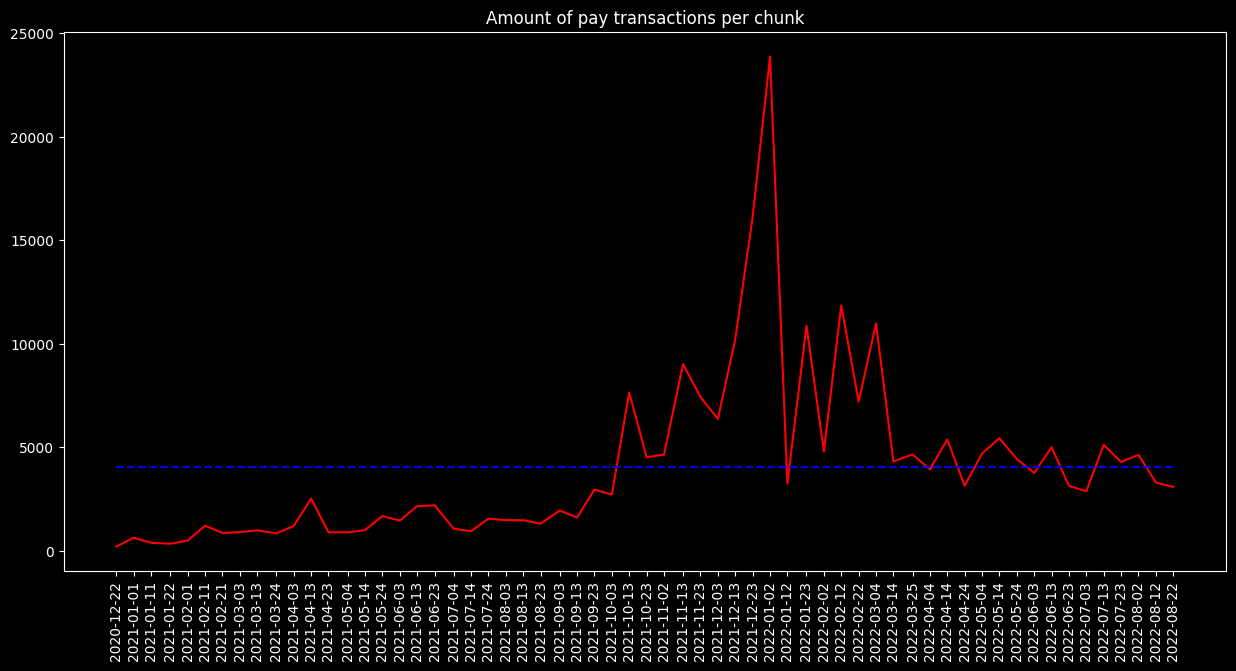

In [37]:
sb.lineplot(x = chunk_dates , y = np.array(transaction_amount_in_microalgo), color = 'red')
sb.lineplot(x = chunk_dates , y = np.mean(np.array(transaction_amount_in_microalgo))*np.ones(61), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Amount of pay transactions per chunk')

Text(0.5, 1.0, 'Mean amount of algo sent per chunk')

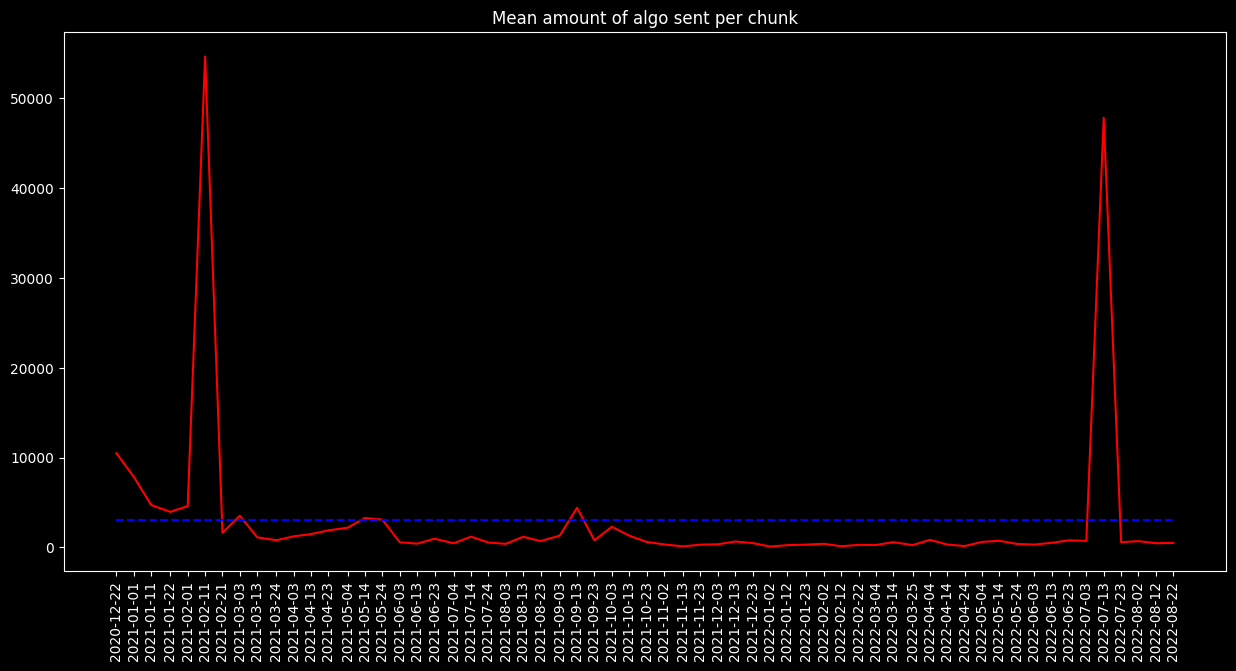

In [38]:
sb.lineplot(x = chunk_dates , y = np.array(mean_amount_of_algo_sent), color = 'red')
sb.lineplot(x = chunk_dates , y = np.mean(np.array(mean_amount_of_algo_sent))*np.ones(61), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Mean amount of algo sent per chunk')

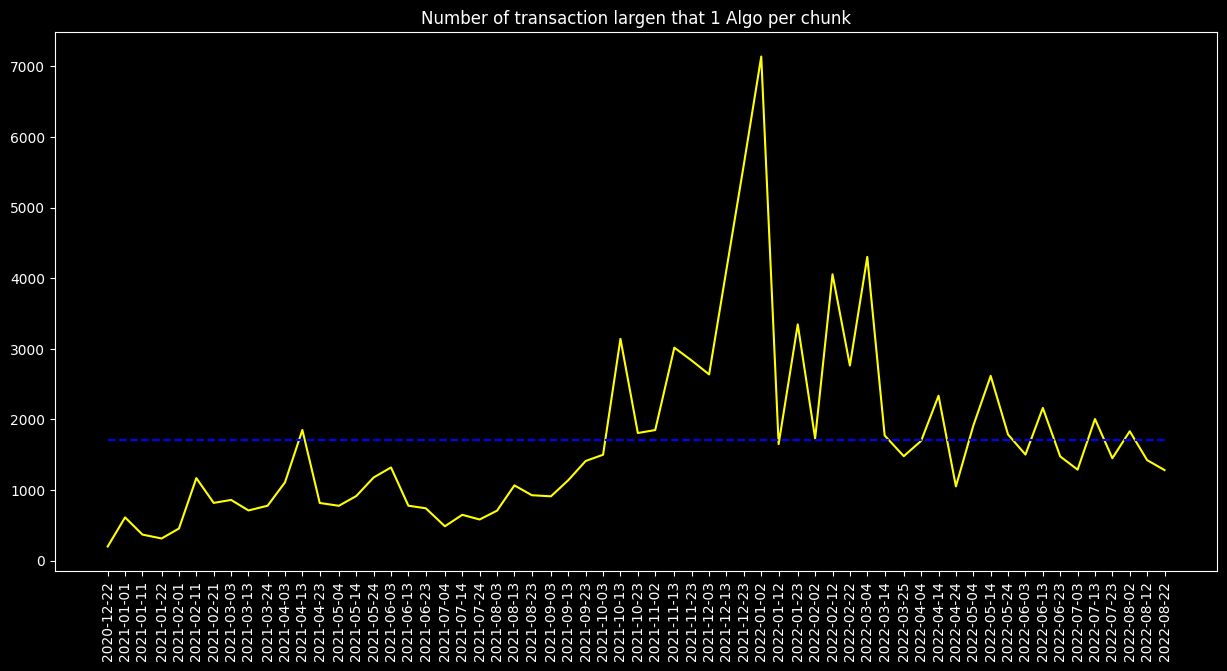

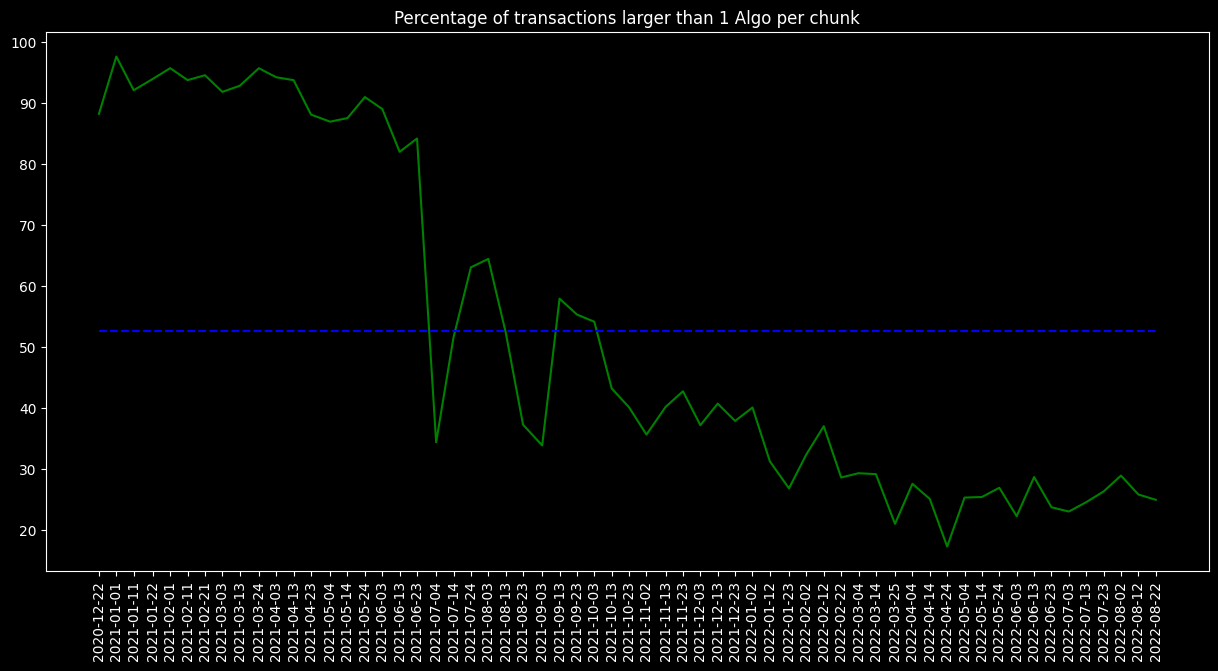

In [39]:
sb.lineplot(x = chunk_dates , y = np.array(more_than_one_algo), color = 'yellow')
sb.lineplot(x = chunk_dates , y = np.mean(np.array(more_than_one_algo))*np.ones(61), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Number of transaction larger that 1 Algo per chunk')
plt.show()

sb.lineplot(x = chunk_dates , y = np.array(more_than_one_algo_percentage), color = 'green')
sb.lineplot(x = chunk_dates , y = np.mean(np.array(more_than_one_algo_percentage))*np.ones(61), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.title('Percentage of transactions larger than 1 Algo per chunk')
plt.show()

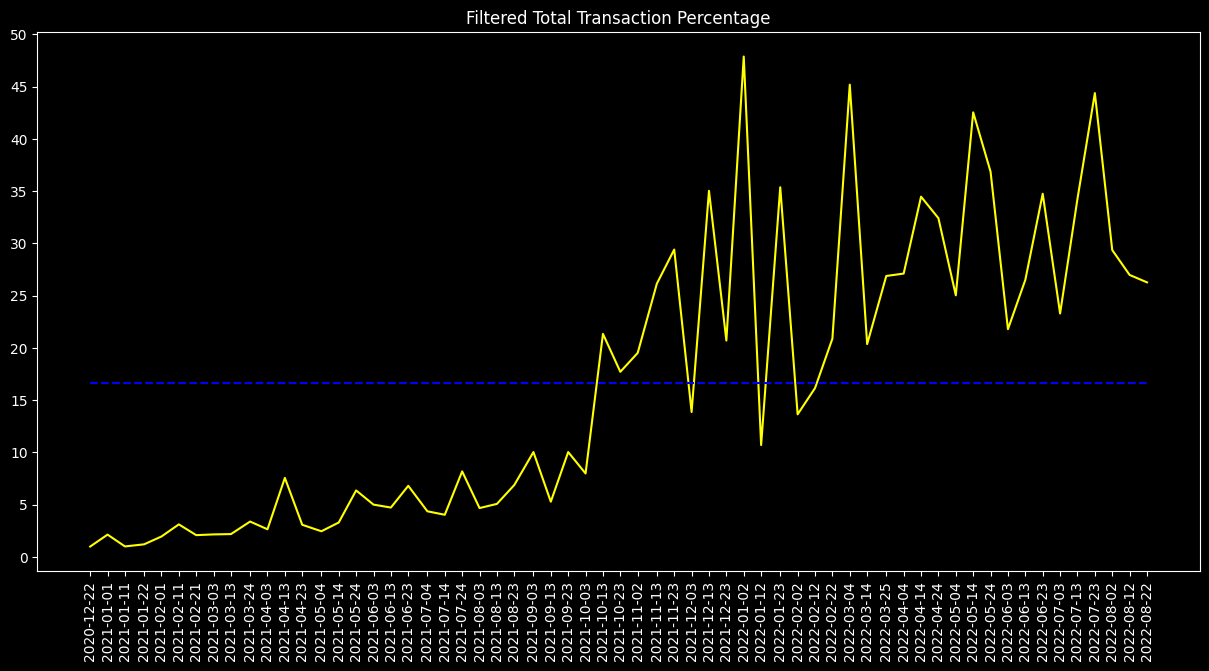

In [40]:
sb.lineplot(x = chunk_dates , y = np.array(filtered_total_transaction_percentage), color = 'yellow')
sb.lineplot(x = chunk_dates , y = np.mean(np.array(filtered_total_transaction_percentage))*np.ones(61), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
plt.yticks(np.arange(0,51,step = 5))
plt.title('Filtered Total Transaction Percentage')
plt.show()

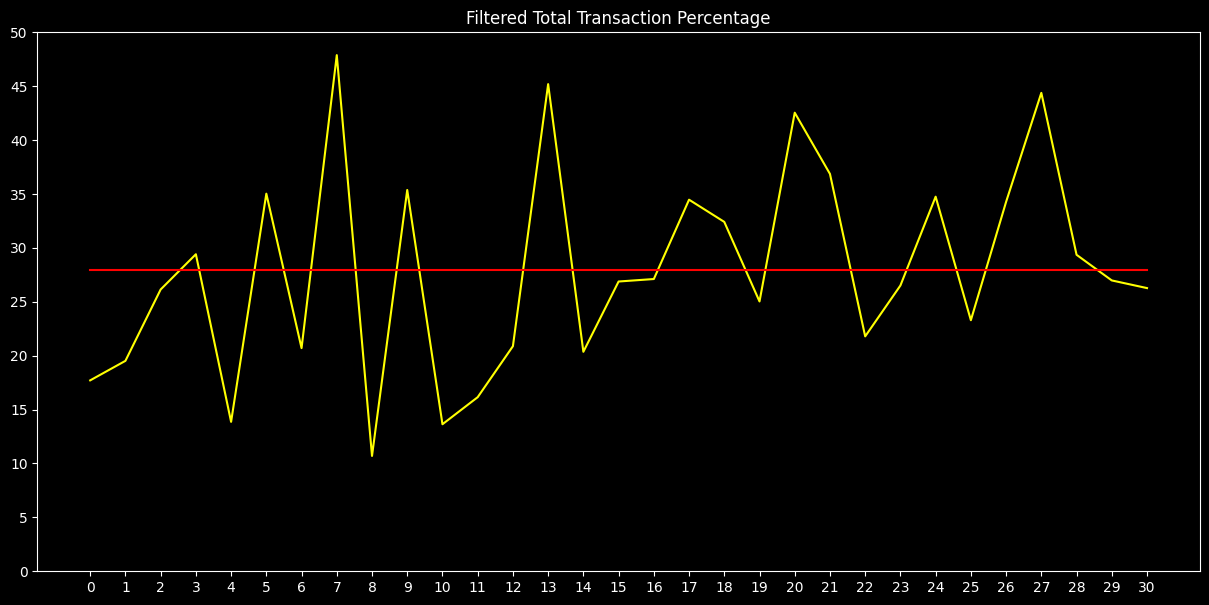

In [41]:
importante = np.array(filtered_total_transaction_percentage[30:])
linea = np.ones(31)*np.mean(importante)
np.mean(importante)
sb.lineplot(importante, color = 'yellow')
sb.lineplot(linea, color = 'red' )
plt.xticks(np.arange(0,31, step = 1))
plt.yticks(np.arange(0,51,step = 5))
plt.title('Filtered Total Transaction Percentage')
plt.show()

61


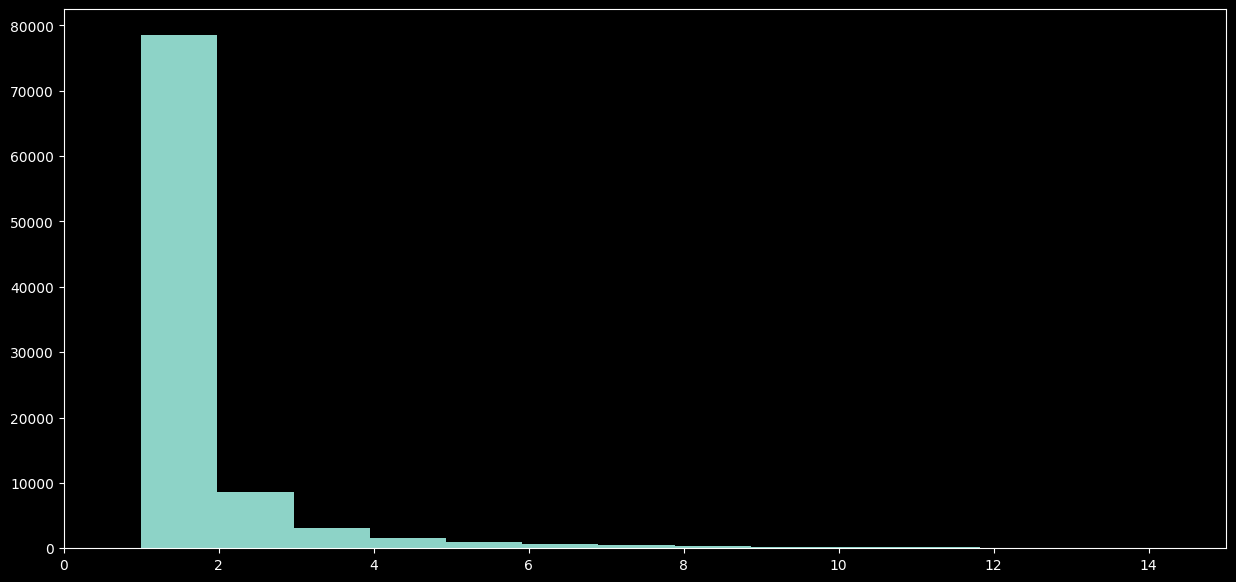

In [47]:
plt.hist(total_activity_per_account, bins = 61)
plt.xlim(0,15)
# plt.ylim(0,1000)
print(np.max(np.array(total_activity_per_account)))

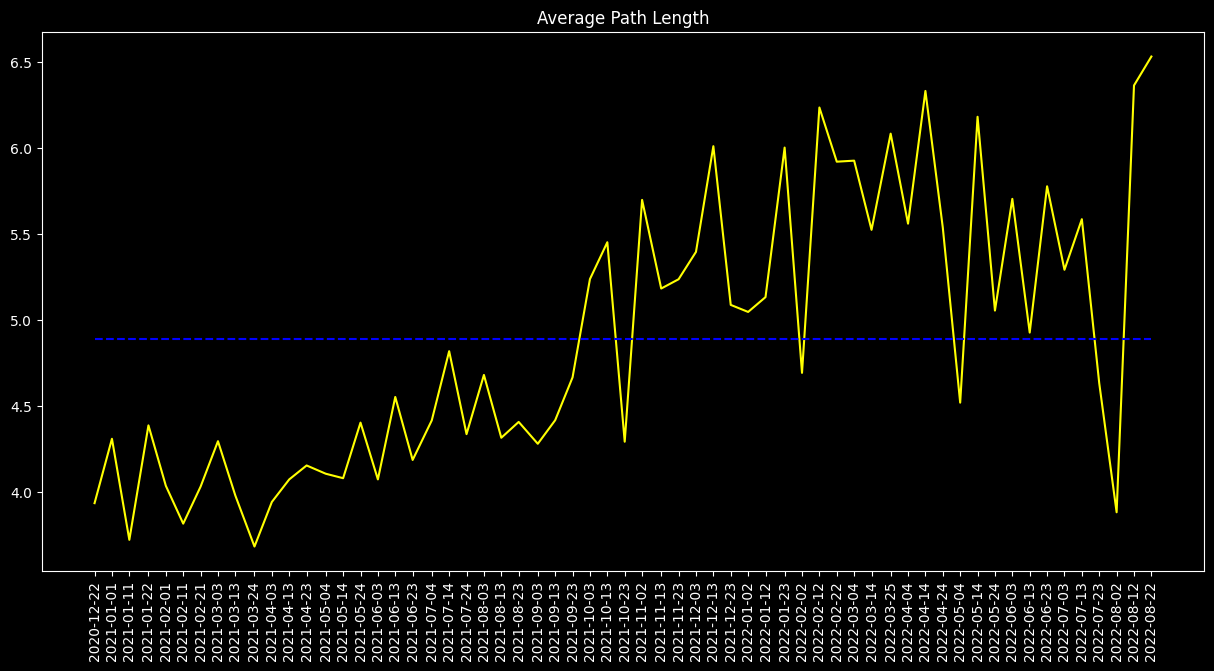

In [43]:
sb.lineplot(x = chunk_dates , y = np.array(average_path_length), color = 'yellow')
sb.lineplot(x = chunk_dates , y = np.mean(np.array(average_path_length))*np.ones(61), color = 'blue', linestyle = 'dashed')
plt.xticks(chunk_dates,fontsize = 10, rotation = 'vertical')
# plt.yticks(np.arange(0,10,step = 2))
plt.title('Average Path Length')
plt.show()

In [ ]:
# NOTAS: A partir de 20600000 aparece una cuenta que distribuye pero que tambien esta MUY conectada con todo lo
# demas. Que se puede hacer en ese caso? Se borra o no?

#NOTAS: Parece haber un crecimiento en el avg path length pero una disminucion en las transacciones totales
# implica que aunque haya menos transacciones la red esta mas conectada que antes

# Agarro 60k bloques de un lado y del otro y vuelvo a comparar las estadisticas.
# Profundizar en la historia de la vieja.




#Parece pasar algo en la fecha de entre Agosto y Octubre de 2021. Por lo que encontre fue la fecha de lanzamientos de dos plataformas de borrowing
# y lending Folks Fianance y Algofi




#Propuesta de tema particular:
# El impacto de la aparición de protocolos Defi sobre las transacciones de la Red